## Business Case: Finance Banking Predication

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
data=pd.read_csv('credit_train.csv')

In [3]:
data #load data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Domain Analysis

- Loan ID
- Customer ID
- Loan Status (e.g., Fully Paid)
- Current Loan Amount
- Loan Term (e.g., Short Term, Long Term)
- Credit Score
- Annual Income
- Years in Current Job
- Home Ownership (e.g., Mortgage, Rent)
- Purpose (e.g., Debt Consolidation, Home Improvements)
- Monthly Debt
- Years of Credit History
- Months since Last Delinquent
- Number of Open Accounts
- Number of Credit Problems
- Current Credit Balance

### Data Information

The dataset seems to belong to the *credit scoring or financial lending domain*. Here's a brief analysis:

1. *Entities*:
   - *Loan*: Represents the financial product being offered to the customer.
   - *Customer*: The individual who has applied for the loan.
   - *Credit*: Related to the customer's creditworthiness, including credit score, credit history, and credit problems.

2. *Attributes*:
   - *Loan-specific attributes*: These include Loan ID, Loan Status, Loan Amount, Loan Term, and Purpose.
   - *Customer-specific attributes*: Credit Score, Annual Income, Years in Current Job, Home Ownership.
   - *Credit-specific attributes*: Monthly Debt, Years of Credit History, Months since Last Delinquent, Number of Open Accounts, Number of Credit Problems, and Current Credit Balance.

3. *Relationships*:
   - *Loan to Customer*: Each loan is associated with a customer. The dataset captures multiple loans per customer (assuming multiple records per Customer ID).
   - *Credit to Loan*: The customer's credit information is used to determine loan eligibility and terms.

4. *Purpose*:
   - The dataset could be used for credit risk analysis, loan approval decisions, or predicting loan defaults.

5. *Potential Use Cases*:
   - *Credit Scoring Models*: Assess the likelihood of a customer repaying the loan.
   - *Loan Default Prediction*: Identify factors that contribute to loan defaults.
   - *Customer Segmentation*: Classify customers based on their credit risk profiles.

This domain analysis focuses on understanding the key components and their relationships within a financial dataset used for credit risk assessment.

## Basis Cheaks

In [4]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [22]:
data.tail()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data.shape

(100514, 16)

In [24]:
data.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  object 
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  object 
 3   Credit Score               80846 non-null   float64
 4   Annual Income              80846 non-null   float64
 5   Years in current job       95778 non-null   object 
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        99

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100000.0,1.176045e+07,3.178394e+07,10802.0,179652.0000,312246.0,5.249420e+05,1.000000e+08
Credit Score,80846.0,1.076456e+03,1.475404e+03,585.0,705.0000,724.0,7.410000e+02,7.510000e+03
Annual Income,80846.0,1.378277e+06,1.081360e+06,76627.0,848844.0000,1174162.0,1.650663e+06,1.655574e+08
Monthly Debt,100000.0,1.847241e+04,1.217499e+04,0.0,10214.1625,16220.3,2.401206e+04,4.358433e+05
Years of Credit History,100000.0,1.819914e+01,7.015324e+00,3.6,13.5000,16.9,2.170000e+01,7.050000e+01
Months since last delinquent,46859.0,3.490132e+01,2.199783e+01,0.0,16.0000,32.0,5.100000e+01,1.760000e+02
Number of Open Accounts,100000.0,1.112853e+01,5.009870e+00,0.0,8.0000,10.0,1.400000e+01,7.600000e+01
Number of Credit Problems,100000.0,1.683100e-01,4.827050e-01,0.0,0.0000,0.0,0.000000e+00,1.500000e+01
Current Credit Balance,100000.0,2.946374e+05,3.761709e+05,0.0,112670.0000,209817.0,3.679588e+05,3.287897e+07
Maximum Open Credit,99998.0,7.607984e+05,8.384503e+06,0.0,273438.0000,467874.0,7.829580e+05,1.539738e+09


In [13]:
data.describe(include='O').T

,count,unique,top,freq
Loan ID,100000,81999,14dd8831-6af5-400b-83ec-68e61888a048,2
Customer ID,100000,81999,981165ec-3274-42f5-a3b4-d104041a9ca9,2
Loan Status,100000,2,Fully Paid,77361
Term,100000,2,Short Term,72208
Years in current job,95778,11,10+ years,31121
Home Ownership,100000,4,Home Mortgage,48410
Purpose,100000,16,Debt Consolidation,78552


In [4]:
data.drop(data[['Loan ID','Customer ID']],axis=1,inplace=True)

In [7]:
# data.drop(data[['Months since last delinquent']],axis=1,inplace=True)  ## these columns most missing value.so there is drop the column

In [5]:
# data['Months since last delinquent'].isnull().sum()/data.shape[0]*100

53.38062359472312

In [9]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [4]:
cat_col=data.select_dtypes(include='O')
print(cat_col.columns)

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job',
       'Home Ownership', 'Purpose'],
      dtype='object')


In [5]:
for i in cat_col:
    print(i,cat_col[i].unique())
    print(cat_col[i].value_counts())
    print('*******************************************************************************************')

Loan ID ['14dd8831-6af5-400b-83ec-68e61888a048'
 '4771cc26-131a-45db-b5aa-537ea4ba5342'
 '4eed4e6a-aa2f-4c91-8651-ce984ee8fb26' ...
 '81ab928b-d1a5-4523-9a3c-271ebb01b4fb'
 'c63916c6-6d46-47a9-949a-51d09af4414f' nan]
Loan ID
14dd8831-6af5-400b-83ec-68e61888a048    2
1373bfdf-ae6d-4fa5-b3e9-73ba60b7868e    2
111602d9-f958-403d-a9d5-4fba630297eb    2
1076b681-b8ff-463f-a7af-576e12edd637    2
f7817002-4e22-4462-8abc-402eb4ceaa6c    2
                                       ..
6c4cac03-f896-4e4c-8503-6c91d83b145b    1
73e806fa-000a-4d7a-ab65-de1b62339427    1
b14a15a8-4d95-4473-9288-77a2b4b486d5    1
c6101fbe-52f3-41b7-b6a1-b062b5f3ad70    1
c63916c6-6d46-47a9-949a-51d09af4414f    1
Name: count, Length: 81999, dtype: int64
*******************************************************************************************
Customer ID ['981165ec-3274-42f5-a3b4-d104041a9ca9'
 '2de017a3-2e01-49cb-a581-08169e83be29'
 '5efb2b2b-bf11-4dfd-a572-3761a2694725' ...
 '3e45ffda-99fd-4cfc-b8b8-446f4a505f36'
 '1b

## Exploratory Data Analysis

### Univariate analysis using sweetviz

In [9]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


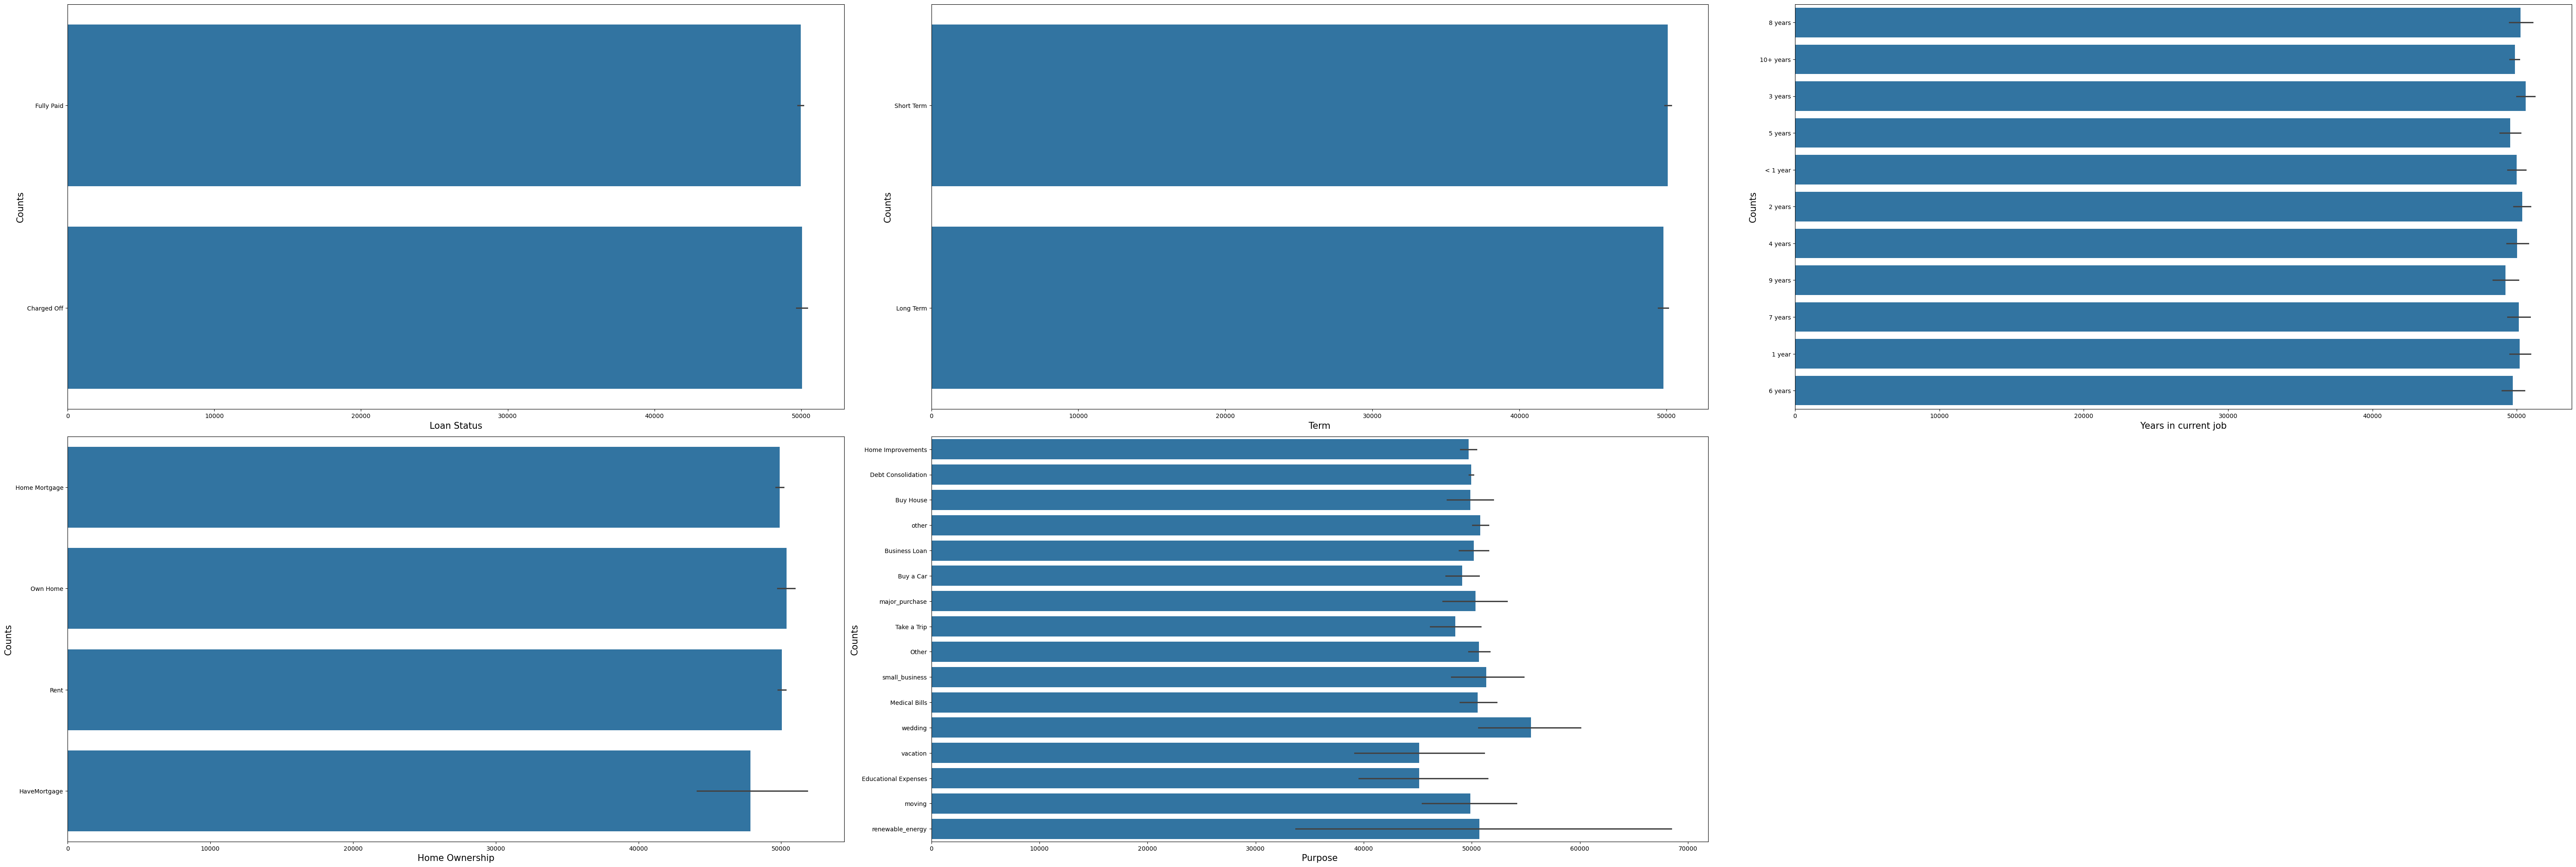

In [21]:
plt.figure(figsize=(60,60),facecolor='white')
plotnumber=1
for i in cat_col:
    if plotnumber<=18:
        plt.subplot(6,3,plotnumber)
        sns.barplot(cat_col[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Counts',fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Biavariant Analysis

#### Checking relationship of all variables with respect to target variable

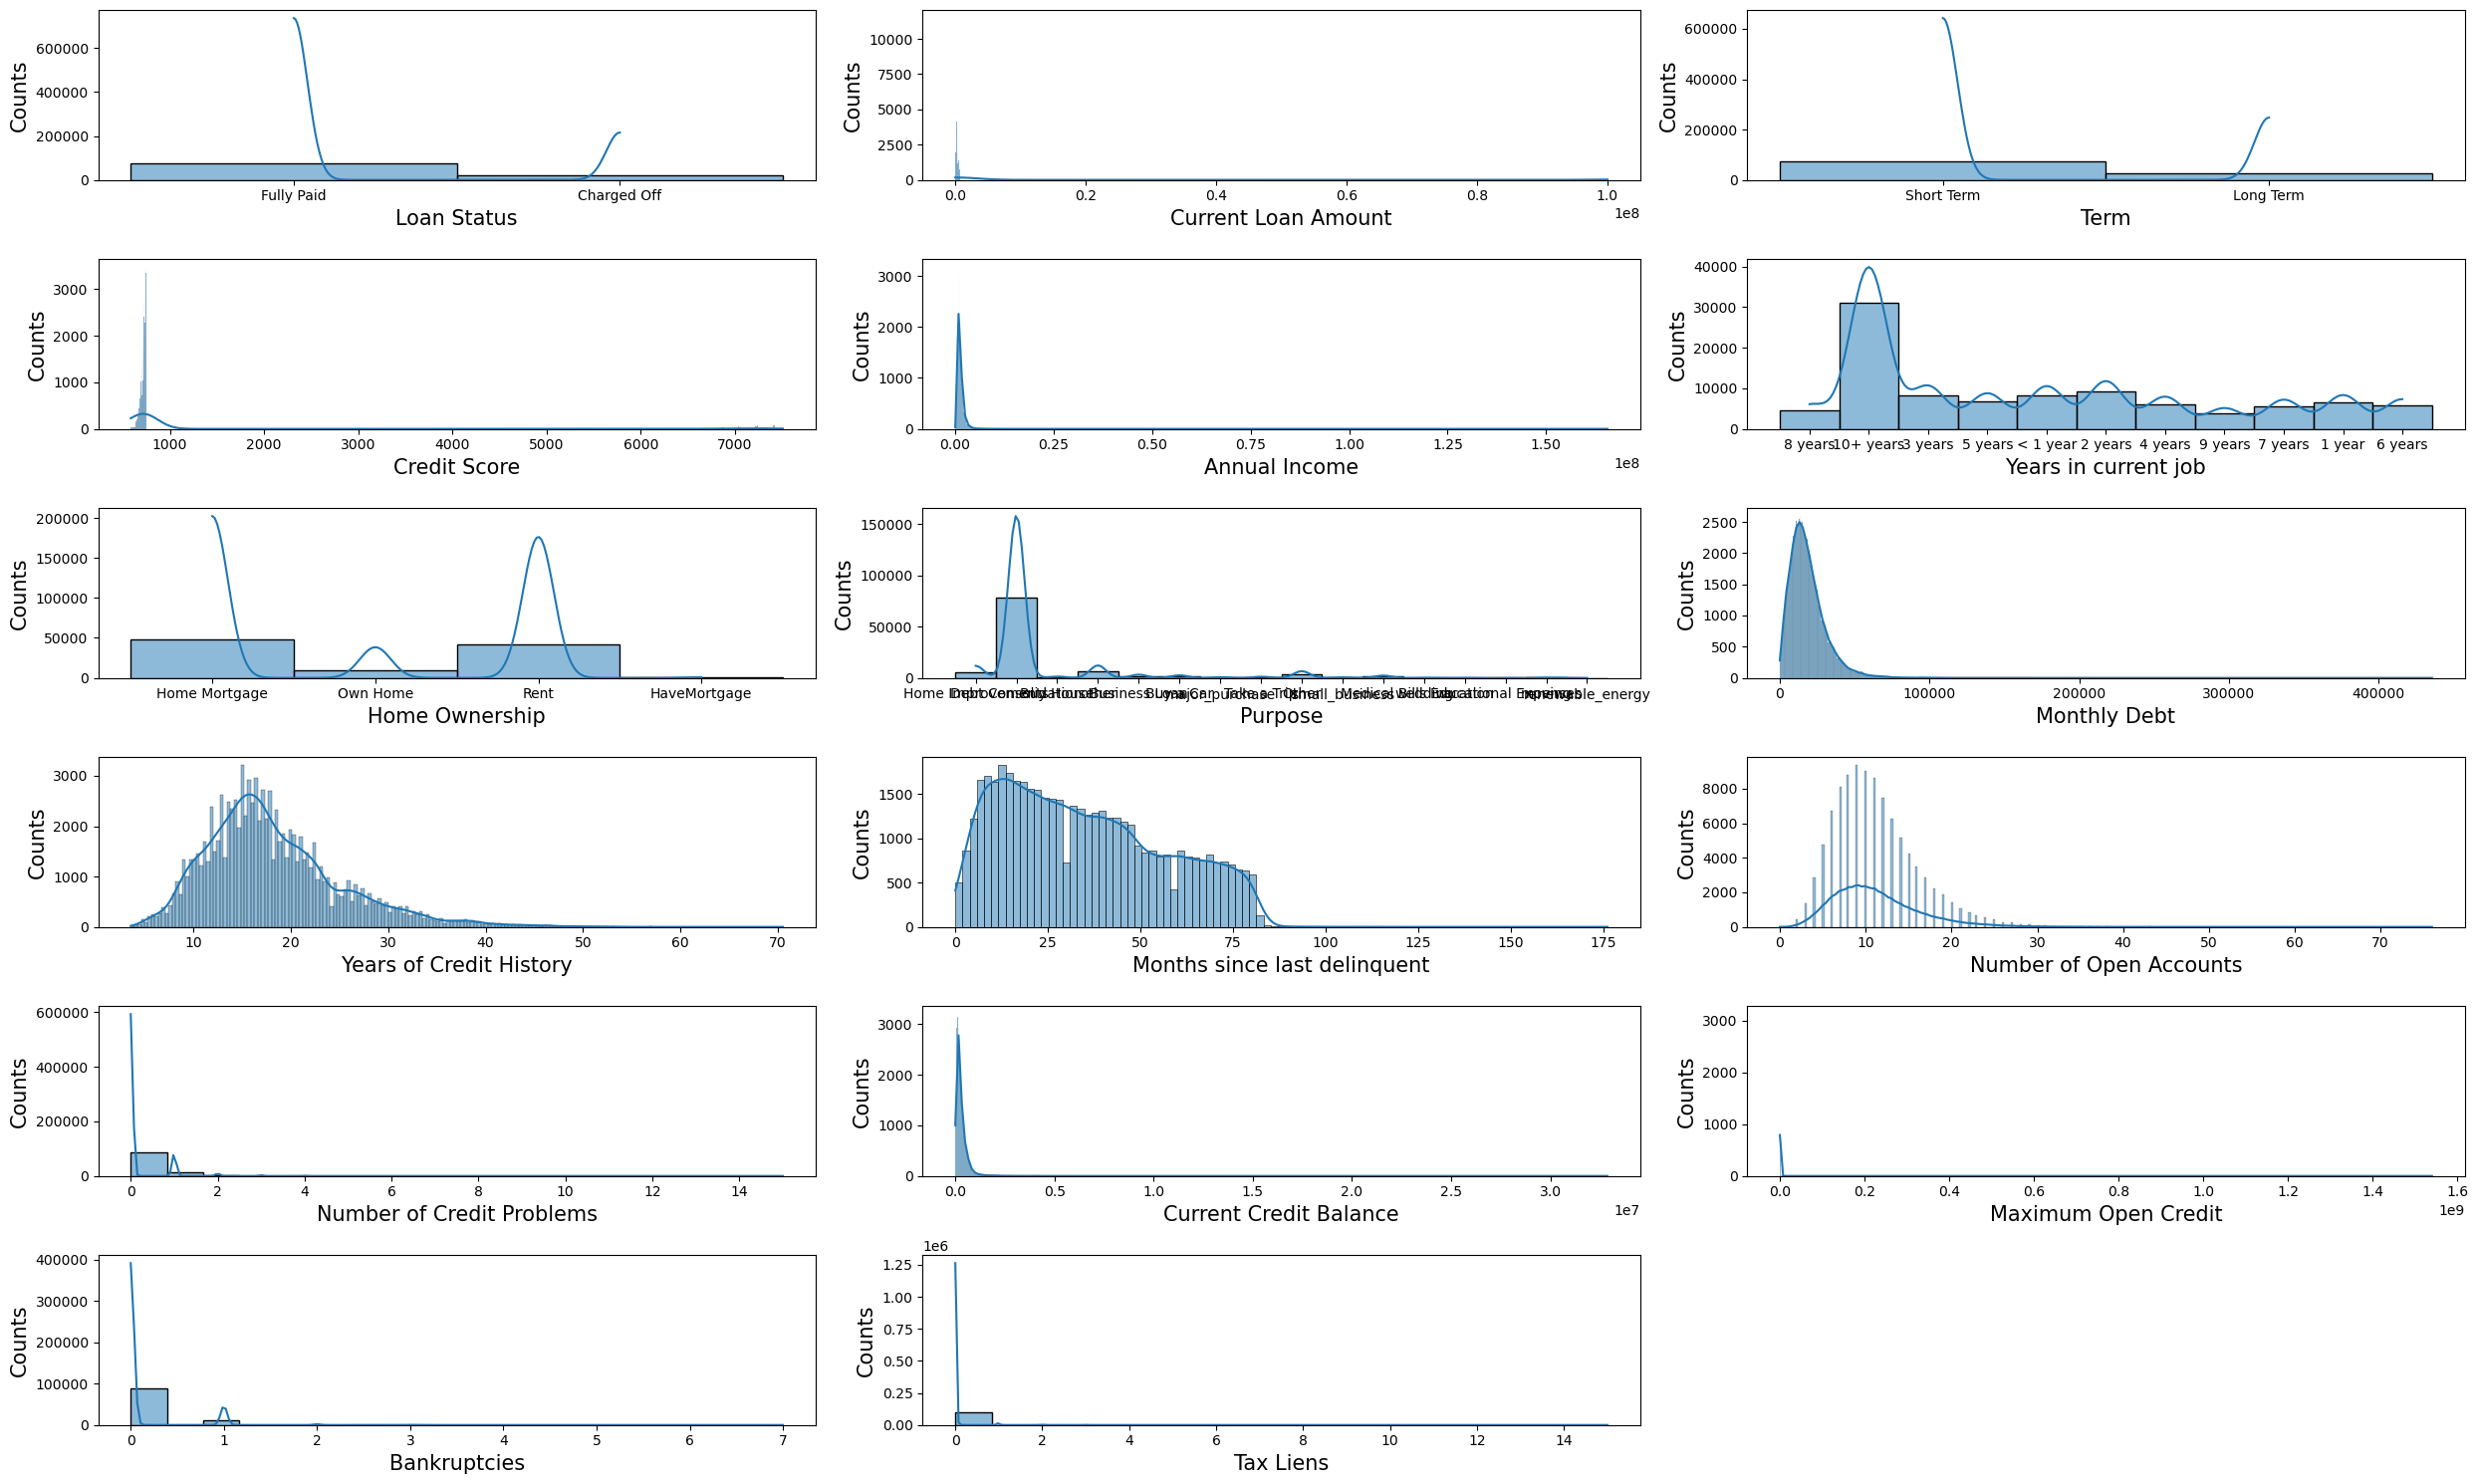

In [19]:
plt.figure(figsize=(25,15),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=18:
        plt.subplot(6,3,plotnumber)
        sns.histplot(data[i],kde=True)
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Counts',fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Insights

To provide insights from the dataset shown in the image, here are some observations based on the available data:

### Insights:

1. *Loan Status Distribution*:
   - The dataset includes loans that are marked as "Fully Paid," which indicates that the loans have been successfully repaid. Understanding the distribution of "Fully Paid" versus other loan statuses could reveal the overall repayment behavior of customers.

2. *Credit Scores*:
   - Credit scores vary across customers, with some having high scores (e.g., 741, 721) and others with missing data (NaN). Higher credit scores generally correlate with lower credit risk, suggesting that these customers are more likely to repay their loans.

3. *Loan Term*:
   - Loans are categorized into "Short Term" and "Long Term." Short-term loans typically have smaller amounts and quicker repayment schedules, while long-term loans may involve larger sums and extended repayment periods. Understanding the relationship between loan term and default risk could be insightful.

4. *Income and Debt Levels*:
   - Customers have diverse income levels (e.g., $117,493.0, $223,189.0) and varying levels of monthly debt (e.g., $5,214.74, $33,295.98). Higher incomes might be correlated with the ability to handle larger debt, but the debt-to-income ratio should be considered to assess financial stress.

5. *Home Ownership*:
   - Customers either have a mortgage, own a home, or rent. Homeowners, especially those with mortgages, might be perceived as lower-risk borrowers since they have collateral, whereas renters may be seen as higher risk due to the lack of owned assets.

6. *Purpose of Loan*:
   - The loans are primarily for purposes like "Debt Consolidation" and "Home Improvements." Debt consolidation loans might be taken by individuals looking to manage multiple debts, which could signal financial strain, whereas home improvement loans may indicate investment in property.

7. *Years of Credit History*:
   - The years of credit history vary, with some customers having over 20 years, while others have much shorter histories. Longer credit histories usually provide a more complete view of a customer's credit behavior, potentially reducing risk.

8. *Number of Credit Problems*:
   - Some customers have recorded credit problems (e.g., 1.0) while others have none (0.0). This metric is crucial for risk assessment, as a history of credit problems could indicate a higher likelihood of default.

9. *Current Credit Balance*:
   - The current credit balance varies widely among customers. High current credit balances could indicate a higher debt burden, which might increase the risk of default, especially if the balance is close to the customer's credit limit.

10. *The image displays a summary of data analysis, possibly from a credit-related dataset, with four main sections: *Current Credit Balance, **Maximum Open Credit, **Bankruptcies, and **Tax Liens*. Here are the key insights from each section:

11. *Current Credit Balance:*
   - *Max Value:* 32.9M
   - *Average Value:* 0.3M
   - *Median Value:* 0.2M
   - *Zeroes:* 572 records have a balance of 0.
   - *Distinct Values:* 32,730 (33%)
   - The data shows a significant range, with a skewed distribution indicated by the large maximum value compared to the median, suggesting a few outliers with very high credit balances.

12. *Maximum Open Credit:*
   - *Max Value:* 1.5B
   - *Average Value:* 0.08M
   - *Median Value:* 0.0B (indicating that a large portion of individuals have very low or no open credit).
   - *Zeroes:* 681 records have a maximum open credit of 0.
   - *Distinct Values:* 44,596 (44%)
   - Similar to the credit balance, there is a wide range with a few extreme outliers, but most records have low or no open credit.

13. *Bankruptcies:*
   - *Distinct Values:* 8 (very few distinct values).
   - *Zeroes:* 98% of the records have no bankruptcies.
   - The data indicates that the vast majority of individuals have not declared bankruptcy, with very few distinct values for those who have.

14. *Tax Liens:*
   - *Max Value:* 15.0
   - *Zeroes:* 98,062 records (98%) have no tax liens.
   - *Distinct Values:* 12
   - Like bankruptcies, tax liens are also rare in the dataset, with most individuals having none.

### Summary:

The dataset offers valuable information for credit risk analysis. Key insights include the impact of credit scores, income levels, home ownership, and credit history on loan repayment behavior. Understanding these factors can help in developing models for predicting loan defaults and optimizing lending strategies. Analyzing the distribution of these features and their correlations could lead to better decision-making in financial lending practices.

In [8]:
data

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check duplicated values

In [7]:
data.duplicated().sum()

10728

In [6]:
data[data.duplicated()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
420,Fully Paid,152372.0,Short Term,697.0,845937.0,< 1 year,Rent,Debt Consolidation,2876.22,8.8,46.0,10.0,0.0,56943.0,215468.0,0.0,0.0
1003,Fully Paid,448712.0,Long Term,696.0,1264602.0,NaN,Home Mortgage,Debt Consolidation,33722.91,16.7,22.0,28.0,2.0,328054.0,895906.0,0.0,2.0
1627,Fully Paid,751300.0,Short Term,716.0,3614978.0,6 years,Home Mortgage,Debt Consolidation,72600.71,11.9,69.0,29.0,0.0,957752.0,2128522.0,0.0,0.0
1828,Fully Paid,341352.0,Long Term,712.0,751108.0,< 1 year,Home Mortgage,Debt Consolidation,10327.83,13.3,NaN,11.0,0.0,81377.0,110858.0,0.0,0.0
2216,Fully Paid,340604.0,Long Term,618.0,928701.0,10+ years,Home Mortgage,Debt Consolidation,21205.52,14.4,NaN,5.0,0.0,291137.0,368808.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# data.drop_duplicates(inplace=True)

## Handle missing values

In [8]:
data.isnull().sum()

Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [9]:
data.isnull().sum()/data.shape[0]*100

Loan Status                      0.511372
Current Loan Amount              0.511372
Term                             0.511372
Credit Score                    19.567423
Annual Income                   19.567423
Years in current job             4.711781
Home Ownership                   0.511372
Purpose                          0.511372
Monthly Debt                     0.511372
Years of Credit History          0.511372
Months since last delinquent    53.380624
Number of Open Accounts          0.511372
Number of Credit Problems        0.511372
Current Credit Balance           0.511372
Maximum Open Credit              0.513361
Bankruptcies                     0.714328
Tax Liens                        0.521320
dtype: float64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100000 non-null  object 
 1   Current Loan Amount        100000 non-null  float64
 2   Term                       100000 non-null  object 
 3   Credit Score               80846 non-null   float64
 4   Annual Income              80846 non-null   float64
 5   Years in current job       95778 non-null   object 
 6   Home Ownership             100000 non-null  object 
 7   Purpose                    100000 non-null  object 
 8   Monthly Debt               100000 non-null  float64
 9   Years of Credit History    100000 non-null  float64
 10  Number of Open Accounts    100000 non-null  float64
 11  Number of Credit Problems  100000 non-null  float64
 12  Current Credit Balance     100000 non-null  float64
 13  Maximum Open Credit        99

## Handle NaN values

### Loan Status

In [17]:
data.loc[data['Loan Status'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data['Loan Status'].mode()

0    Fully Paid
Name: Loan Status, dtype: object

In [5]:
data.loc[data['Loan Status'].isnull()==True,'Loan Status']= 'Fully Paid'

In [6]:
data['Loan Status'].isnull().sum()

0

In [7]:
data['Loan Status'].value_counts()

Loan Status
Fully Paid     77875
Charged Off    22639
Name: count, dtype: int64

## Current Loan Amout

In [8]:
data.loc[data['Current Loan Amount'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.loc[data['Current Loan Amount'].isnull()==True,'Current Loan Amount']=data['Current Loan Amount'].median()

In [10]:
# data=data.dropna(subset=['Credit Score','Annual Income'])

## Credit Score 

In [11]:
data.loc[data['Credit Score'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
7,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
11,Fully Paid,541970.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Home Improvements,23568.55,23.2,NaN,23.0,0.0,60705.0,1634468.0,0.0,0.0
15,Fully Paid,449020.0,Long Term,NaN,NaN,9 years,Own Home,Debt Consolidation,18904.81,19.4,NaN,8.0,0.0,334533.0,428956.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data['Credit Score'].median()

724.0

In [13]:
data.loc[data['Credit Score'].isnull()==True,'Credit Score']=data['Credit Score'].median()

In [14]:
data['Credit Score'].isnull().sum()

0

## Term 

In [15]:
data.loc[data['Term'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,Fully Paid,312246.0,NaN,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,Fully Paid,312246.0,NaN,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,Fully Paid,312246.0,NaN,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,Fully Paid,312246.0,NaN,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,Fully Paid,312246.0,NaN,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,NaN,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,NaN,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,NaN,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,NaN,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.Term.mode()

0    Short Term
Name: Term, dtype: object

In [17]:
data.loc[data['Term'].isnull()==True,'Term']= 'Short Term'

In [18]:
data.Term.isnull().sum()

0

In [19]:
data.Term.value_counts()

Term
Short Term    72722
Long Term     27792
Name: count, dtype: int64

## Annual Income

In [20]:
data.loc[data['Annual Income'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,Fully Paid,262328.0,Short Term,724.0,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,724.0,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
7,Charged Off,648714.0,Long Term,724.0,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
11,Fully Paid,541970.0,Short Term,724.0,NaN,10+ years,Home Mortgage,Home Improvements,23568.55,23.2,NaN,23.0,0.0,60705.0,1634468.0,0.0,0.0
15,Fully Paid,449020.0,Long Term,724.0,NaN,9 years,Own Home,Debt Consolidation,18904.81,19.4,NaN,8.0,0.0,334533.0,428956.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data.loc[data['Annual Income'].isnull()==True,'Annual Income']=data['Annual Income'].median()

In [22]:
data['Annual Income'].isnull().sum()

0

## Years in current job

In [23]:
data.loc[data['Years in current job'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
29,Fully Paid,107404.0,Short Term,724.0,1174162.0,NaN,Home Mortgage,other,19238.07,43.7,NaN,5.0,0.0,28956.0,58014.0,0.0,0.0
73,Fully Paid,311058.0,Long Term,675.0,1343167.0,NaN,Home Mortgage,Debt Consolidation,21378.80,31.4,17.0,11.0,0.0,247912.0,541596.0,0.0,0.0
84,Fully Paid,262988.0,Short Term,743.0,1340279.0,NaN,Rent,Debt Consolidation,9348.38,28.2,35.0,9.0,0.0,499548.0,681296.0,0.0,0.0
96,Fully Paid,158818.0,Short Term,731.0,315666.0,NaN,Own Home,Debt Consolidation,8522.83,31.3,60.0,13.0,2.0,260072.0,756646.0,0.0,2.0
169,Fully Paid,64966.0,Short Term,723.0,1224968.0,NaN,Home Mortgage,other,23172.21,44.0,48.0,16.0,0.0,858154.0,1344574.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
data['Years in current job'].mode()

0    10+ years
Name: Years in current job, dtype: object

In [25]:
data.loc[data['Years in current job'].isnull()==True,'Years in current job']= '10+ years'

In [26]:
data['Years in current job'].isnull().sum()

0

In [27]:
data['Years in current job'].value_counts()

Years in current job
10+ years    35857
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: count, dtype: int64

## Home Owership

In [28]:
data.loc[data['Home Ownership'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
data['Home Ownership'].mode()

0    Home Mortgage
Name: Home Ownership, dtype: object

In [30]:
data.loc[data['Home Ownership'].isnull()==True,'Home Ownership'] = 'Home Mortgage'

In [31]:
data['Home Ownership'].isnull().sum()

0

## Purpose

In [32]:
data.loc[data['Purpose'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data.Purpose.mode()

0    Debt Consolidation
Name: Purpose, dtype: object

In [34]:
data.loc[data['Purpose'].isnull()==True,'Purpose']= 'Debt Consolidation'

In [35]:
data.Purpose.isnull().sum()

0

## Monthly Debt

In [36]:
data.loc[data['Monthly Debt'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data.loc[data['Monthly Debt'].isnull()==True,'Monthly Debt'] =data['Monthly Debt'].median()

In [38]:
data['Monthly Debt'].isnull().sum()

0

## Years of Credit History

In [39]:
data.loc[data['Years of Credit History'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data.loc[data['Years of Credit History'].isnull()==True,'Years of Credit History'] =data['Years of Credit History'].median()

In [41]:
data['Years of Credit History'].isnull().sum()

0

## Months since last delinquent

In [42]:
data.loc[data['Months since last delinquent'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
3,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,Fully Paid,176220.0,Short Term,724.0,1174162.0,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
9,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data.loc[data['Months since last delinquent'].isnull()==True,'Months since last delinquent']=data['Months since last delinquent'].median()

In [44]:
data['Months since last delinquent'].isnull().sum()

0

## Number of open Accounts

In [45]:
data.loc[data['Number of Open Accounts'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,NaN,NaN,NaN,NaN,NaN,NaN
100001,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,NaN,NaN,NaN,NaN,NaN,NaN
100002,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,NaN,NaN,NaN,NaN,NaN,NaN
100003,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,NaN,NaN,NaN,NaN,NaN,NaN
100004,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,NaN,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,NaN,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,NaN,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
data.loc[data['Number of Open Accounts'].isnull()==True,'Number of Open Accounts'] =data['Number of Open Accounts'].median()

In [47]:
data['Number of Open Accounts'].isnull().sum()

0

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100514 non-null  object 
 1   Current Loan Amount           100514 non-null  float64
 2   Term                          100514 non-null  object 
 3   Credit Score                  100514 non-null  float64
 4   Annual Income                 100514 non-null  float64
 5   Years in current job          100514 non-null  object 
 6   Home Ownership                100514 non-null  object 
 7   Purpose                       100514 non-null  object 
 8   Monthly Debt                  100514 non-null  float64
 9   Years of Credit History       100514 non-null  float64
 10  Months since last delinquent  100514 non-null  float64
 11  Number of Open Accounts       100514 non-null  float64
 12  Number of Credit Problems     100000 non-nul

## Number of Credit Problems

In [49]:
data.loc[data['Number of Credit Problems'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,NaN,NaN,NaN,NaN,NaN
100001,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,NaN,NaN,NaN,NaN,NaN
100002,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,NaN,NaN,NaN,NaN,NaN
100003,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,NaN,NaN,NaN,NaN,NaN
100004,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,NaN,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,NaN,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,NaN,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,NaN,NaN,NaN,NaN,NaN


In [50]:
data.loc[data['Number of Credit Problems'].isnull()==True,'Number of Credit Problems'] =data['Number of Credit Problems'].median()

In [51]:
data['Number of Credit Problems'].isnull().sum()

0

## Current Credit Balance

In [52]:
data.loc[data['Current Credit Balance'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,0.0,NaN,NaN,NaN,NaN
100001,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,0.0,NaN,NaN,NaN,NaN
100002,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,0.0,NaN,NaN,NaN,NaN
100003,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,0.0,NaN,NaN,NaN,NaN
100004,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,0.0,NaN,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,0.0,NaN,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,0.0,NaN,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.3,16.9,32.0,10.0,0.0,NaN,NaN,NaN,NaN


In [53]:
data.loc[data['Current Credit Balance'].isnull()==True,'Current Credit Balance'] =data['Current Credit Balance'].median()

In [54]:
data['Current Credit Balance'].isnull().sum()

0

## Maximum Open Credit

In [55]:
data.loc[data['Maximum Open Credit'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
30180,Charged Off,32340.0,Short Term,724.0,1174162.0,2 years,Rent,Debt Consolidation,9620.46,15.3,26.0,3.0,0.0,0.0,NaN,0.0,0.0
98710,Charged Off,45144.0,Short Term,7030.0,1806995.0,10+ years,Rent,Debt Consolidation,36290.38,22.4,37.0,9.0,0.0,0.0,NaN,0.0,0.0
100000,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,NaN,NaN,NaN
100001,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,NaN,NaN,NaN
100002,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,NaN,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,NaN,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,NaN,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,NaN,NaN,NaN


In [56]:
data.loc[data['Maximum Open Credit'].isnull()==True,'Maximum Open Credit'] =data['Maximum Open Credit'].median()

In [57]:
data['Maximum Open Credit'].isnull().sum()

0

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100514 non-null  object 
 1   Current Loan Amount           100514 non-null  float64
 2   Term                          100514 non-null  object 
 3   Credit Score                  100514 non-null  float64
 4   Annual Income                 100514 non-null  float64
 5   Years in current job          100514 non-null  object 
 6   Home Ownership                100514 non-null  object 
 7   Purpose                       100514 non-null  object 
 8   Monthly Debt                  100514 non-null  float64
 9   Years of Credit History       100514 non-null  float64
 10  Months since last delinquent  100514 non-null  float64
 11  Number of Open Accounts       100514 non-null  float64
 12  Number of Credit Problems     100514 non-nul

## Bankruptcies

In [59]:
data.loc[data['Bankruptcies'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
905,Charged Off,495066.0,Short Term,712.0,1766012.0,3 years,Rent,Debt Consolidation,23693.95,15.6,45.0,11.0,0.0,14991.0,168432.0,NaN,0.0
1699,Charged Off,324830.0,Short Term,717.0,709916.0,8 years,Rent,Debt Consolidation,12955.91,13.8,0.0,14.0,0.0,280421.0,753346.0,NaN,0.0
1995,Charged Off,553080.0,Short Term,740.0,1910640.0,1 year,Rent,Business Loan,2499.64,26.0,28.0,9.0,0.0,323.0,376090.0,NaN,0.0
3462,Fully Paid,67166.0,Short Term,741.0,707579.0,4 years,Rent,other,1586.31,21.5,0.0,4.0,0.0,28842.0,100606.0,NaN,0.0
4587,Charged Off,245146.0,Short Term,705.0,1010477.0,1 year,Home Mortgage,Debt Consolidation,15072.89,17.5,0.0,14.0,0.0,342038.0,760144.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,NaN,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,NaN,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,NaN,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,NaN,NaN


In [60]:
data.loc[data['Bankruptcies'].isnull()==True,'Bankruptcies'] =data['Bankruptcies'].median()

In [61]:
data.Bankruptcies.isnull().sum()

0

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100514 non-null  object 
 1   Current Loan Amount           100514 non-null  float64
 2   Term                          100514 non-null  object 
 3   Credit Score                  100514 non-null  float64
 4   Annual Income                 100514 non-null  float64
 5   Years in current job          100514 non-null  object 
 6   Home Ownership                100514 non-null  object 
 7   Purpose                       100514 non-null  object 
 8   Monthly Debt                  100514 non-null  float64
 9   Years of Credit History       100514 non-null  float64
 10  Months since last delinquent  100514 non-null  float64
 11  Number of Open Accounts       100514 non-null  float64
 12  Number of Credit Problems     100514 non-nul

## Tax Liens

In [63]:
data.loc[data['Tax Liens'].isnull()==True]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
9632,Fully Paid,99999999.0,Short Term,632.0,968202.0,1 year,Rent,Debt Consolidation,10166.14,13.0,0.0,12.0,0.0,57038.0,71566.0,0.0,NaN
10546,Fully Paid,110792.0,Short Term,720.0,1530944.0,< 1 year,Own Home,Debt Consolidation,1543.75,20.0,0.0,15.0,1.0,520239.0,3741474.0,0.0,NaN
19274,Fully Paid,118712.0,Short Term,746.0,1431441.0,7 years,Home Mortgage,Debt Consolidation,17177.33,24.5,0.0,15.0,0.0,132392.0,1064536.0,0.0,NaN
20727,Fully Paid,78738.0,Short Term,735.0,262276.0,< 1 year,Rent,Educational Expenses,3584.35,13.6,0.0,10.0,0.0,55632.0,156750.0,0.0,NaN
28595,Fully Paid,259952.0,Short Term,702.0,1403207.0,9 years,Own Home,Debt Consolidation,17540.04,21.3,78.0,9.0,0.0,805239.0,998250.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,NaN
100510,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,NaN
100511,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,NaN
100512,Fully Paid,312246.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,NaN


In [64]:
data.loc[data['Tax Liens'].isnull()==True,'Tax Liens'] =data['Tax Liens'].median()

In [65]:
data['Tax Liens'].isnull().sum()

0

In [66]:
data.isnull().sum()   ## handling null values

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [137]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Current Loan Amount,100514.0,1.170190e+07,3.171309e+07,10802.0,179916.000,312246.0,523292.000,1.000000e+08
Credit Score,100514.0,1.007490e+03,1.330570e+03,585.0,711.000,724.0,738.000,7.510000e+03
Annual Income,100514.0,1.338337e+06,9.731830e+05,76627.0,932425.000,1174162.0,1509968.000,1.655574e+08
Monthly Debt,100514.0,1.846090e+04,1.214489e+04,0.0,10245.845,16220.3,23959.475,4.358433e+05
Years of Credit History,100514.0,1.819250e+01,6.997977e+00,3.6,13.500,16.9,21.600,7.050000e+01
Number of Open Accounts,100514.0,1.112276e+01,4.997693e+00,0.0,8.000,10.0,14.000,7.600000e+01
Number of Credit Problems,100514.0,1.674493e-01,4.816188e-01,0.0,0.000,0.0,0.000,1.500000e+01
Current Credit Balance,100514.0,2.942036e+05,3.752567e+05,0.0,113107.000,209817.0,366657.250,3.287897e+07
Maximum Open Credit,100514.0,7.592946e+05,8.362980e+06,0.0,274516.000,467874.0,780428.000,1.539738e+09
Bankruptcies,100514.0,1.168991e-01,3.503068e-01,0.0,0.000,0.0,0.000,7.000000e+00


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                100514 non-null  object 
 1   Current Loan Amount        100514 non-null  float64
 2   Term                       100514 non-null  object 
 3   Credit Score               100514 non-null  float64
 4   Annual Income              100514 non-null  float64
 5   Years in current job       100514 non-null  object 
 6   Home Ownership             100514 non-null  object 
 7   Purpose                    100514 non-null  object 
 8   Monthly Debt               100514 non-null  float64
 9   Years of Credit History    100514 non-null  float64
 10  Number of Open Accounts    100514 non-null  float64
 11  Number of Credit Problems  100514 non-null  float64
 12  Current Credit Balance     100514 non-null  float64
 13  Maximum Open Credit        10

## Checking Outliers

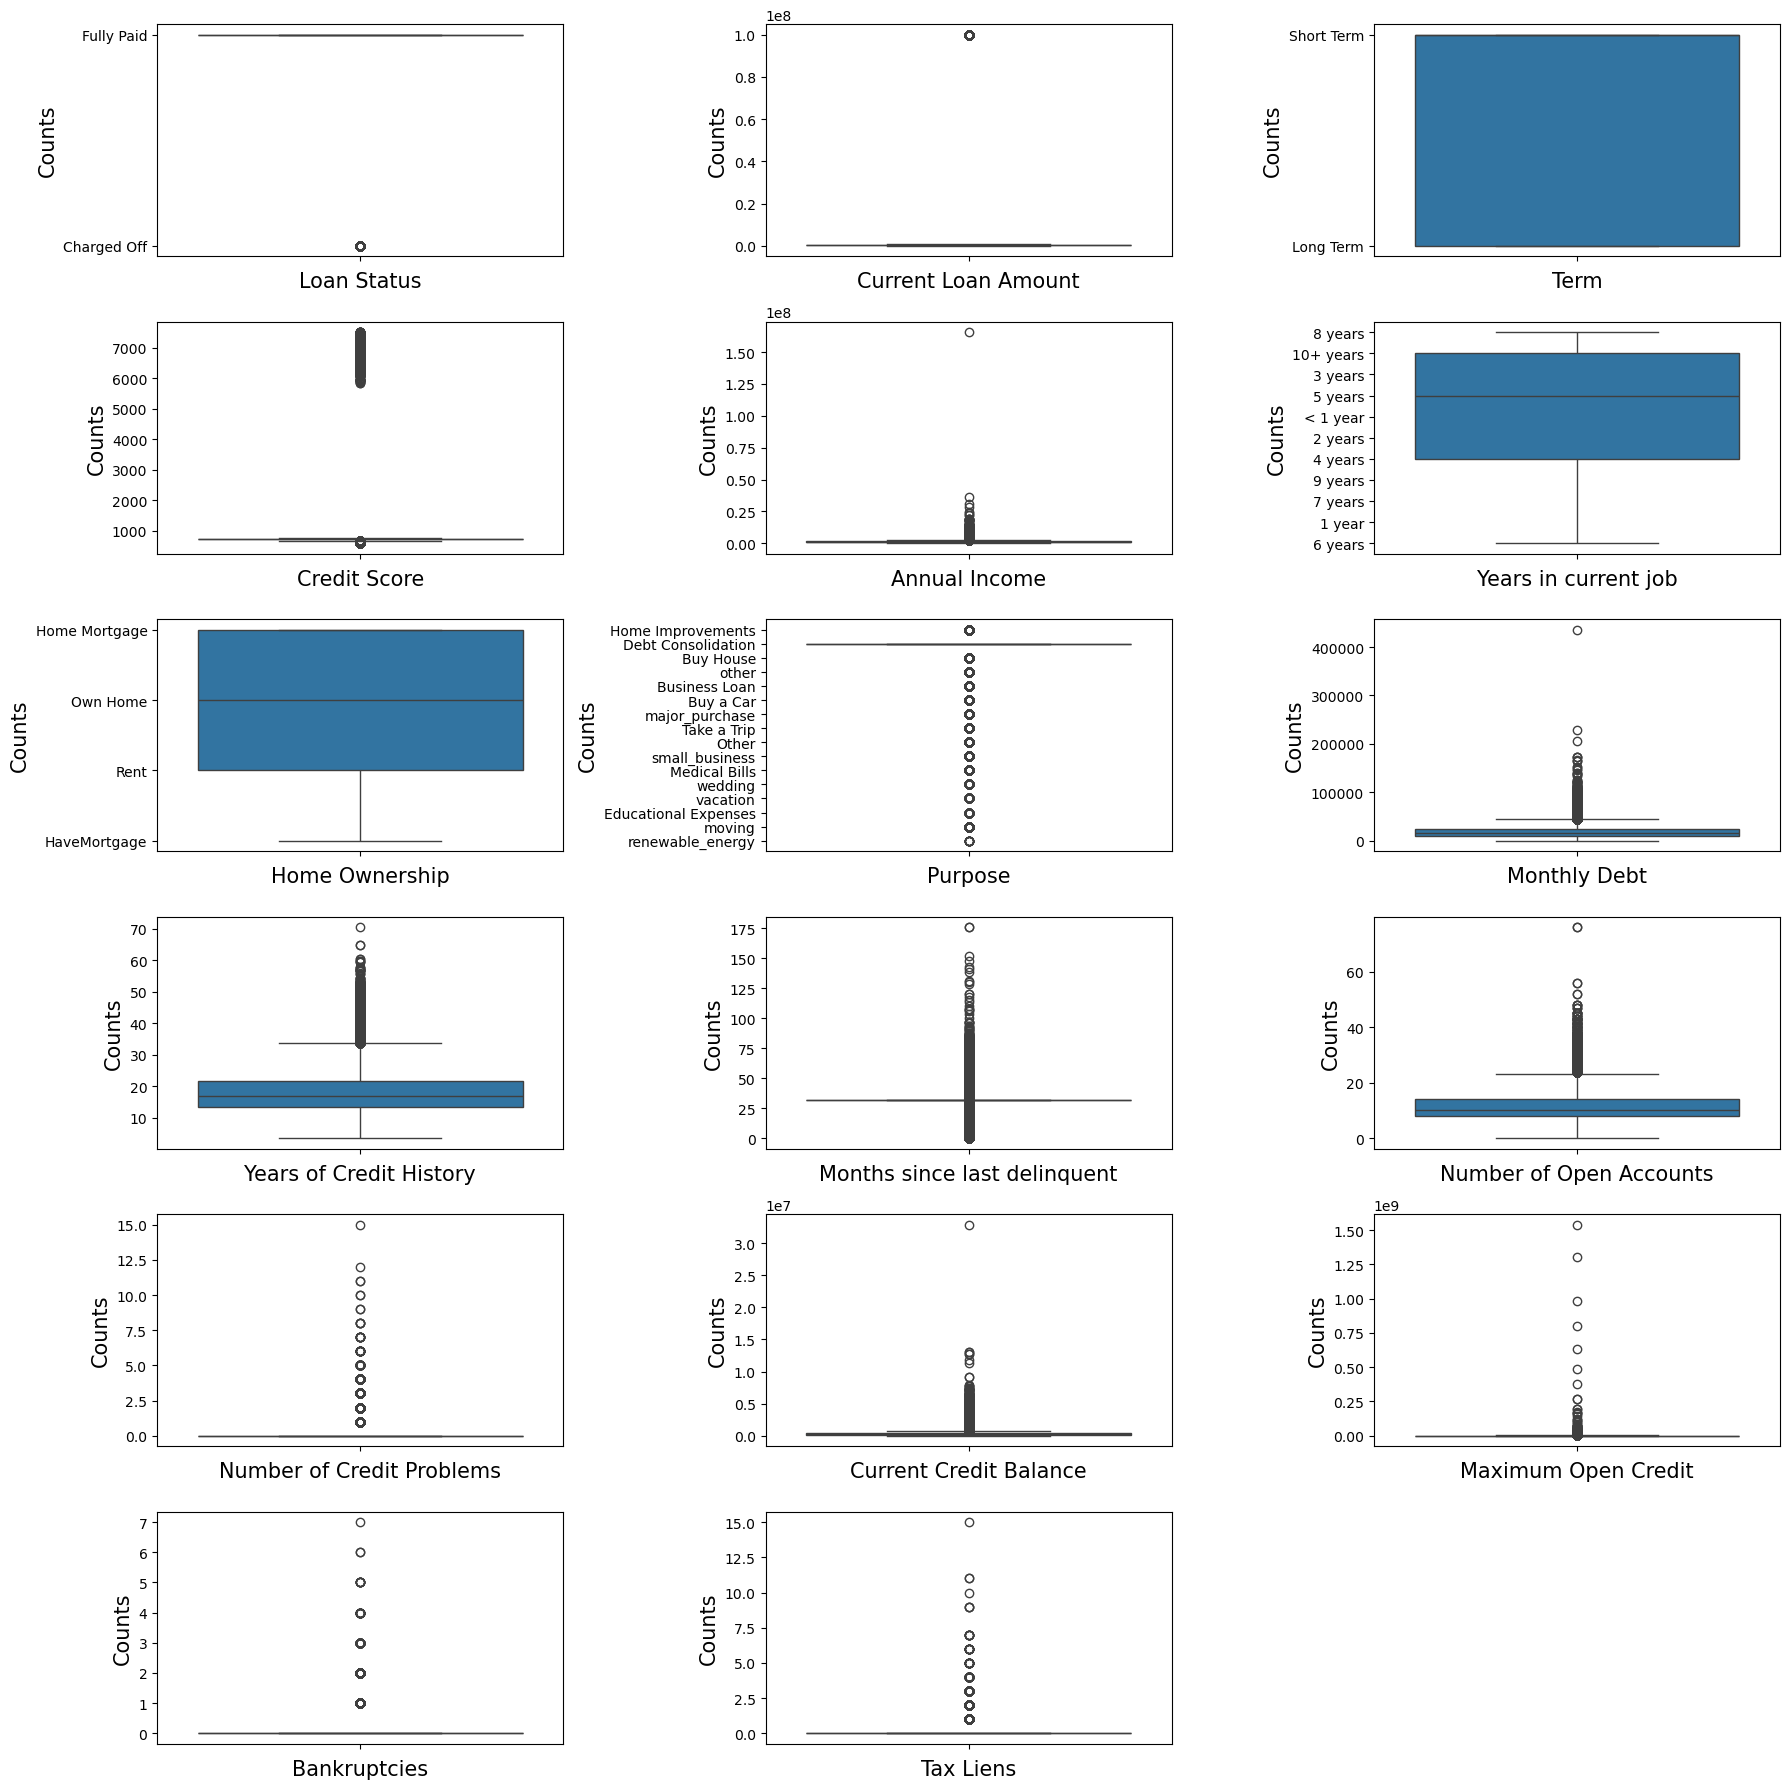

In [23]:
plt.figure(figsize=(18,18),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Counts',fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Handling Outliers

In [67]:
## Current Loan Amount
Q3=data['Current Loan Amount'].quantile(0.75)
Q1=data['Current Loan Amount'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 *IQR
lower_limit=Q1 - 1.5 * IQR

In [68]:
len(data.loc[data['Current Loan Amount']>upper_limit])/len(data)*100

11.42527409117138

In [69]:
len(data.loc[data['Current Loan Amount']<lower_limit])/len(data)*100

0.0

In [70]:
## Credit Score
Q3=data['Credit Score'].quantile(0.75)
Q1=data['Credit Score'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 *IQR
lower_limit=Q1 - 1.5 * IQR

In [71]:
len(data.loc[data['Credit Score']>upper_limit])/len(data)*100

4.5277274807489505

In [72]:
len(data.loc[data['Credit Score']<lower_limit])/len(data)*100

5.70368306902521

In [73]:
data.loc[data['Credit Score']>upper_limit]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,32.0,6.0,0.0,215308.0,272448.0,0.0,0.0
43,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,32.0,4.0,0.0,132468.0,164406.0,0.0,0.0
51,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,32.0,8.0,0.0,104633.0,199936.0,0.0,0.0
65,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,32.0,5.0,0.0,474658.0,742720.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99851,Charged Off,198572.0,Short Term,7420.0,526205.0,2 years,Rent,Debt Consolidation,9910.02,16.5,32.0,8.0,0.0,296704.0,433224.0,0.0,0.0
99872,Charged Off,110924.0,Short Term,7070.0,804631.0,4 years,Rent,Debt Consolidation,11533.00,13.3,61.0,9.0,0.0,60154.0,96470.0,0.0,0.0
99906,Charged Off,175362.0,Short Term,6880.0,1060162.0,9 years,Rent,Debt Consolidation,16079.13,17.3,32.0,13.0,0.0,277153.0,333234.0,0.0,0.0
99944,Charged Off,88968.0,Short Term,6790.0,441845.0,< 1 year,Rent,other,5375.86,8.5,32.0,10.0,0.0,193306.0,535458.0,0.0,0.0


In [74]:
data.loc[data['Credit Score']>upper_limit,'Credit Score']=data['Credit Score'].median()

In [75]:
## Annual Income
Q3=data['Annual Income'].quantile(0.75)
Q1=data['Annual Income'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 *IQR
lower_limit=Q1 - 1.5 * IQR

In [76]:
len(data.loc[data['Annual Income']>upper_limit])/len(data)*100

6.939331834371332

In [77]:
len(data.loc[data['Annual Income']<lower_limit])/len(data)*100

0.0

In [78]:
## Monthly Debt
Q3=data['Monthly Debt'].quantile(0.75)
Q1=data['Monthly Debt'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 *IQR
lower_limit=Q1 - 1.5 * IQR

In [79]:
len(data.loc[data['Monthly Debt']>upper_limit])/len(data)*100

3.4025110929820723

In [80]:
data.loc[data['Monthly Debt']>upper_limit,'Monthly Debt']=data['Monthly Debt'].median()

In [81]:
data.loc[data['Monthly Debt']>upper_limit]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [82]:
len(data.loc[data['Monthly Debt']<lower_limit])/len(data)*100

0.0

<Axes: xlabel='Monthly Debt'>

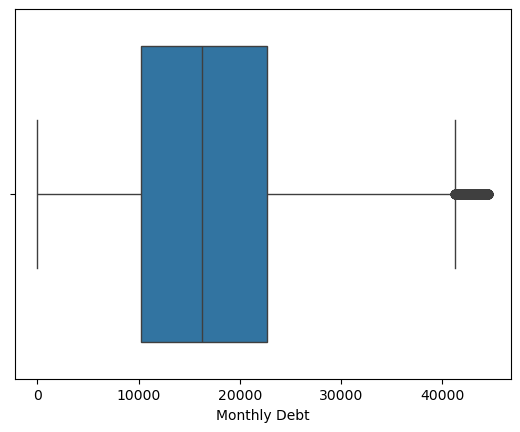

In [83]:
sns.boxplot(x=data['Monthly Debt'])

In [84]:
## Years of Credit History
Q3=data['Years of Credit History'].quantile(0.75)
Q1=data['Years of Credit History'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 *IQR
lower_limit=Q1 - 1.5 * IQR

In [85]:
len(data.loc[data['Years of Credit History']>upper_limit])/len(data)*100

3.282129852557852

In [86]:
data.loc[data['Years of Credit History']>upper_limit,'Years of Credit History']=data['Years of Credit History'].median()

In [87]:
data.loc[data['Years of Credit History']>upper_limit]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [88]:
len(data.loc[data['Years of Credit History']<lower_limit])/len(data)*100

0.0

In [89]:
## months since last delinquent
Q3 = data['Months since last delinquent'].quantile(0.75)
Q1 = data['Months since last delinquent'].quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [90]:
len(data.loc[data['Months since last delinquent']>upper_limit])/len(data)*100

22.769962393298446

In [91]:
len(data.loc[data['Months since last delinquent']<lower_limit])/len(data)*100

23.18482997393398

In [92]:
## Number of Open Accounts
Q3=data['Number of Open Accounts'].quantile(0.75)
Q1=data['Number of Open Accounts'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 *IQR
lower_limit=Q1 - 1.5 * IQR

In [93]:
len(data.loc[data['Number of Open Accounts']>upper_limit])/len(data)*100

2.271325387508208

In [94]:
data.loc[data['Number of Open Accounts']>upper_limit]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1,Fully Paid,262328.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
46,Fully Paid,129712.0,Short Term,723.0,1465698.0,10+ years,Own Home,Debt Consolidation,18199.15,19.4,6.0,34.0,1.0,45106.0,163218.0,0.0,0.0
118,Charged Off,509586.0,Long Term,678.0,1816001.0,2 years,Rent,Debt Consolidation,26180.67,13.9,74.0,32.0,1.0,115672.0,319638.0,1.0,0.0
274,Fully Paid,325622.0,Short Term,724.0,1174162.0,3 years,Rent,Debt Consolidation,8831.01,15.2,48.0,25.0,0.0,144172.0,415250.0,0.0,0.0
312,Fully Paid,448712.0,Long Term,696.0,1264602.0,10+ years,Home Mortgage,Debt Consolidation,33722.91,16.7,22.0,28.0,2.0,328054.0,895906.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99956,Fully Paid,338162.0,Short Term,745.0,1362851.0,3 years,Home Mortgage,Debt Consolidation,21124.20,17.8,32.0,25.0,0.0,257735.0,586300.0,0.0,0.0
99967,Fully Paid,786940.0,Short Term,723.0,2330160.0,10+ years,Home Mortgage,Debt Consolidation,16220.30,28.1,32.0,31.0,0.0,1049845.0,1861596.0,0.0,0.0
99976,Fully Paid,333630.0,Short Term,724.0,1174162.0,10+ years,Own Home,Debt Consolidation,35234.17,30.7,32.0,24.0,0.0,291650.0,1075492.0,0.0,0.0
99985,Fully Paid,179454.0,Short Term,708.0,1356068.0,4 years,Home Mortgage,Debt Consolidation,22318.54,22.7,21.0,25.0,0.0,387410.0,1705616.0,0.0,0.0


In [95]:
data.loc[data['Number of Open Accounts']>upper_limit,'Number of Open Accounts']=data['Number of Open Accounts'].median()

In [96]:
len(data.loc[data['Number of Open Accounts']<lower_limit])/len(data)*100

0.0

In [97]:
## Number of Credit Problems
Q3=data['Number of Credit Problems'].quantile(0.75)
Q1=data['Number of Credit Problems'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 *IQR
lower_limit=Q1 - 1.5 * IQR

In [98]:
len(data.loc[data['Number of Credit Problems']>upper_limit])/len(data)*100

13.893586963010126

In [99]:
len(data.loc[data['Number of Credit Problems']<lower_limit])/len(data)*100

0.0

In [100]:
## Current Credit Balance
Q3=data['Current Credit Balance'].quantile(0.75)
Q1=data['Current Credit Balance'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 *IQR
lower_limit=Q1 - 1.5 * IQR

In [101]:
len(data.loc[data['Current Credit Balance']>upper_limit])/len(data)*100

5.231112083888812

In [102]:
len(data.loc[data['Current Credit Balance']<lower_limit])/len(data)*100

0.0

In [103]:
## Maximum Open Credit
Q3=data['Maximum Open Credit'].quantile(0.75)
Q1=data['Maximum Open Credit'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 *IQR
lower_limit=Q1 - 1.5 * IQR

In [104]:
len(data.loc[data['Current Credit Balance']>upper_limit])/len(data)*100

1.0187635553256262

In [105]:
data.loc[data['Current Credit Balance']>upper_limit,'Current Credit Balance']=data['Current Credit Balance'].median()

In [106]:
data.loc[data['Current Credit Balance']>upper_limit]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [107]:
len(data.loc[data['Current Credit Balance']<lower_limit])/len(data)*100

0.0

In [108]:
## Bankrupticies
Q3=data['Bankruptcies'].quantile(0.75)
Q1=data['Bankruptcies'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 * IQR
lower_limit=Q1 - 1.5 * IQR

In [109]:
len(data.loc[data['Bankruptcies']>upper_limit])/len(data)*100

10.96563662773345

In [110]:
len(data.loc[data['Bankruptcies']<lower_limit])/len(data)*100

0.0

In [111]:
## Tax Liens
Q3=data['Tax Liens'].quantile(0.75)
Q1=data['Tax Liens'].quantile(0.25)
IQR = Q3 - Q1
upper_limit=Q3 + 1.5 *IQR
lower_limit=Q1 - 1.5 * IQR

In [112]:
len(data.loc[data['Tax Liens']>upper_limit])/len(data)*100

1.9181407565115307

In [113]:
data.loc[data['Tax Liens']>upper_limit,'Tax Liens']=data['Tax Liens'].median()

In [114]:
data.loc[data['Tax Liens']>upper_limit]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [115]:
len(data.loc[data['Tax Liens']<lower_limit])/len(data)*100

0.0

## Handle all outliers

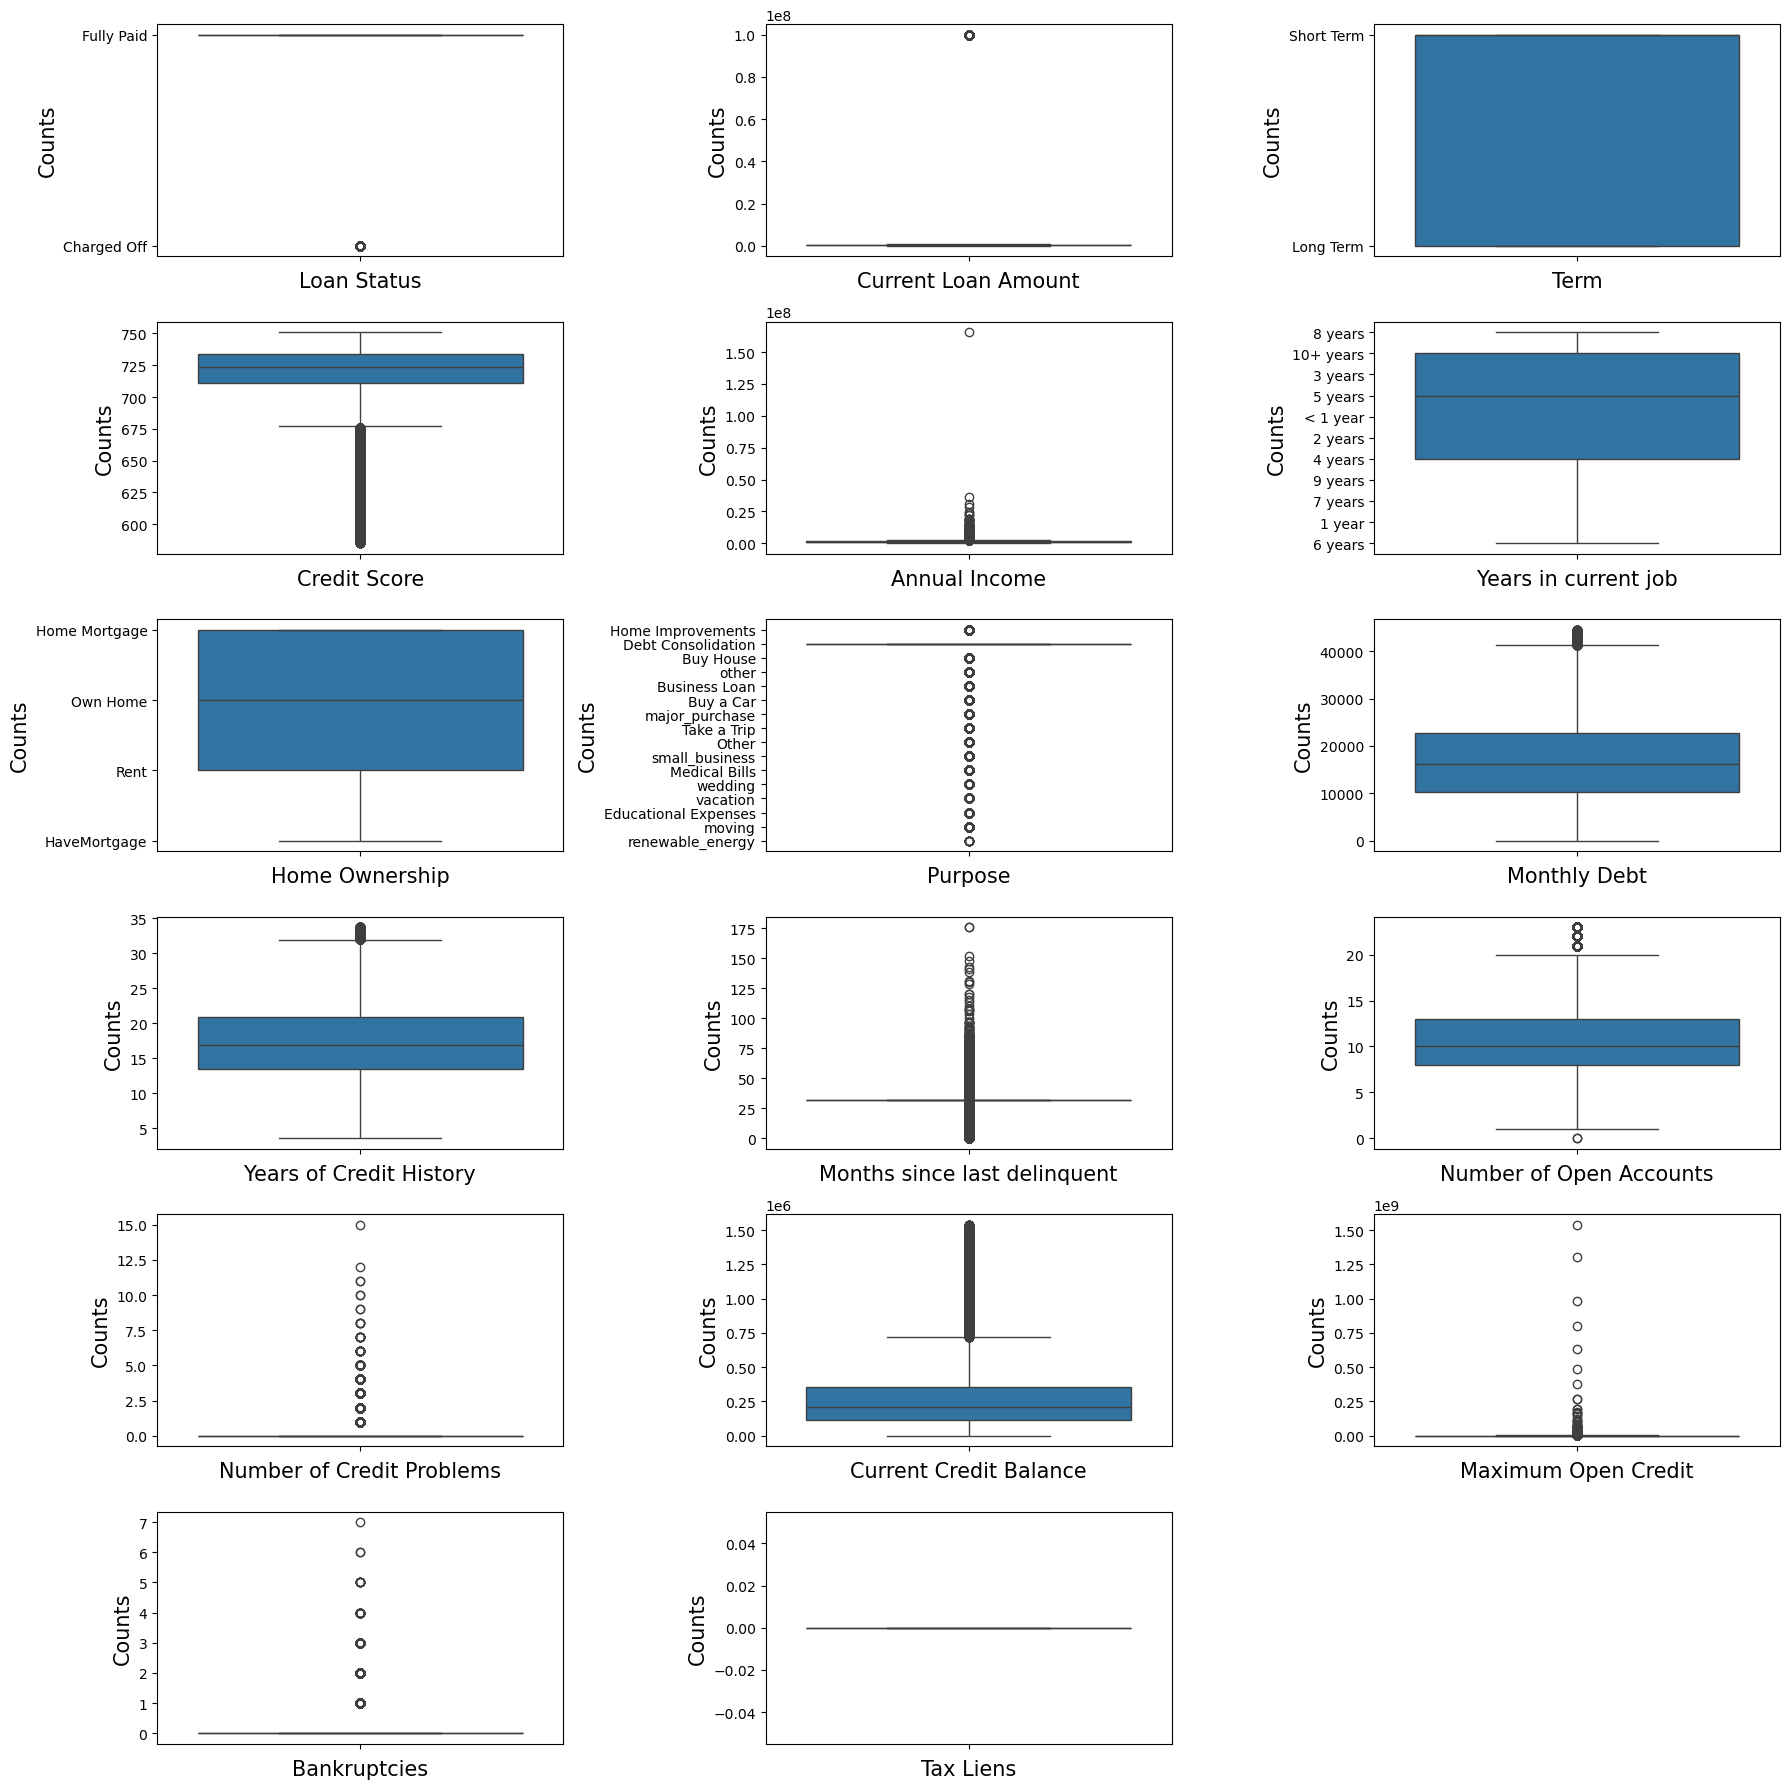

In [116]:
plt.figure(figsize=(18,18),facecolor='white')
plotnumber=1
for i in data:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(data[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Counts',fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Encoding useing map

In [117]:
data['Loan Status'].value_counts()

Loan Status
Fully Paid     77875
Charged Off    22639
Name: count, dtype: int64

In [118]:
data['Loan Status']=data['Loan Status'].map({'Fully Paid':1,'Charged Off':0})

In [119]:
data.head(3)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,Short Term,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,10.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0


In [120]:
data['Term'].value_counts()

Term
Short Term    72722
Long Term     27792
Name: count, dtype: int64

In [121]:
data['Term']=data['Term'].map({'Short Term':1,'Long Term':0})

In [122]:
data.head(3)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,724.0,1174162.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,10.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0


In [123]:
data['Years in current job'].value_counts()

Years in current job
10+ years    35857
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: count, dtype: int64

In [124]:
data['Years in current job']=data['Years in current job'].str.replace(' ','')
data['Years in current job']=data['Years in current job'].str.replace('<','')
data['Years in current job']=data['Years in current job'].str.replace('year',' ')
data['Years in current job']=data['Years in current job'].str.replace('+','')
data['Years in current job']=data['Years in current job'].str.replace('s','')

In [125]:
data['Years in current job'].value_counts()

Years in current job
10     35857
1      14624
2       9134
3       8169
5       6787
4       6143
6       5686
7       5577
8       4582
9       3955
Name: count, dtype: int64

In [126]:
data['Home Ownership'].value_counts()

Home Ownership
Home Mortgage    48924
Rent             42194
Own Home          9182
HaveMortgage       214
Name: count, dtype: int64

In [127]:
data['Home Ownership']=data['Home Ownership'].map({'Home Mortgage':3,'Rent':2,'Own Home':1,'HaveMortgage':0})

In [128]:
data.head(3)

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,445412.0,1,709.0,1167493.0,8,3,Home Improvements,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,724.0,1174162.0,10,3,Debt Consolidation,33295.98,21.1,8.0,10.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8,1,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0


In [129]:
data.Purpose.value_counts()

Purpose
Debt Consolidation      79066
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: count, dtype: int64

In [130]:
data.Purpose=data.Purpose.map({'Debt Consolidation':15,'other':14,'Home Improvements':13,'Other':12,'Business Loan':11,'Buy a Car':10,'Medical Bills':9,
                               'Buy House':8,'Take a Trip':7,'major_purchase':6,'small_business':5,'moving':4,'wedding':3,'vacation':2,
                               'Educational Expenses':1,'renewable_energy':0})

In [131]:
data.Purpose.value_counts()

Purpose
15    79066
14     6037
13     5839
12     3250
11     1569
10     1265
9      1127
8       678
7       573
6       352
5       283
4       150
3       115
2       101
1        99
0        10
Name: count, dtype: int64

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100514 non-null  int64  
 1   Current Loan Amount           100514 non-null  float64
 2   Term                          100514 non-null  int64  
 3   Credit Score                  100514 non-null  float64
 4   Annual Income                 100514 non-null  float64
 5   Years in current job          100514 non-null  object 
 6   Home Ownership                100514 non-null  int64  
 7   Purpose                       100514 non-null  int64  
 8   Monthly Debt                  100514 non-null  float64
 9   Years of Credit History       100514 non-null  float64
 10  Months since last delinquent  100514 non-null  float64
 11  Number of Open Accounts       100514 non-null  float64
 12  Number of Credit Problems     100514 non-nul

In [133]:
data.Purpose.value_counts()

Purpose
15    79066
14     6037
13     5839
12     3250
11     1569
10     1265
9      1127
8       678
7       573
6       352
5       283
4       150
3       115
2       101
1        99
0        10
Name: count, dtype: int64

In [134]:
data.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [135]:
# data.loc[data['Purpose'].isnull()==True,'Purpose']='Debt Consolidation'

In [136]:
data.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100514 non-null  int64  
 1   Current Loan Amount           100514 non-null  float64
 2   Term                          100514 non-null  int64  
 3   Credit Score                  100514 non-null  float64
 4   Annual Income                 100514 non-null  float64
 5   Years in current job          100514 non-null  object 
 6   Home Ownership                100514 non-null  int64  
 7   Purpose                       100514 non-null  int64  
 8   Monthly Debt                  100514 non-null  float64
 9   Years of Credit History       100514 non-null  float64
 10  Months since last delinquent  100514 non-null  float64
 11  Number of Open Accounts       100514 non-null  float64
 12  Number of Credit Problems     100514 non-nul

In [138]:
## change data type 'object' to 'int'
data['Years in current job']=data['Years in current job'].astype('int32')## convert into object ot int
# data.Purpose=data.Purpose.astype('int32')

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan Status                   100514 non-null  int64  
 1   Current Loan Amount           100514 non-null  float64
 2   Term                          100514 non-null  int64  
 3   Credit Score                  100514 non-null  float64
 4   Annual Income                 100514 non-null  float64
 5   Years in current job          100514 non-null  int32  
 6   Home Ownership                100514 non-null  int64  
 7   Purpose                       100514 non-null  int64  
 8   Monthly Debt                  100514 non-null  float64
 9   Years of Credit History       100514 non-null  float64
 10  Months since last delinquent  100514 non-null  float64
 11  Number of Open Accounts       100514 non-null  float64
 12  Number of Credit Problems     100514 non-nul

In [140]:
data.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Annual Income', 'Years in current job', 'Home Ownership', 'Purpose',
       'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## Rename the columns

In [141]:
data.rename(columns = {'Loan Status':'loan_status',
                       'Current Loan Amount':'current_loan_amount',
                       'Term':'term',
                       'Credit Score':'credit_score',
                       'Annual Income':'annual_income',
                       'Years in current job':'years_in_current_job',
                       'Home Ownership':'home_ownership',
                       'Purpose':'purpose',
                       'Monthly Debt':'monthly_debt',
                       'Years of Credit History':'years_of_credit_history',
                       'Months since last delinquent':'months_since_last_delinquent',
                       'Number of Open Accounts':'number_of_open_accounts',
                       'Number of Credit Problems':'number_of_credit_problems',
                       'Current Credit Balance':'current_credit_balance',
                       'Maximum Open Credit':'maximum_open_credit',
                       'Bankruptcies':'bankruptcies',
                       'Tax Liens':'tax_liens'},inplace=True)

In [142]:
data.head()

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,1,445412.0,1,709.0,1167493.0,8,3,13,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,724.0,1174162.0,10,3,15,33295.98,21.1,8.0,10.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8,1,15,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3,1,15,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,724.0,1174162.0,5,2,15,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,0.0,0.0


## Checking Corr-relation

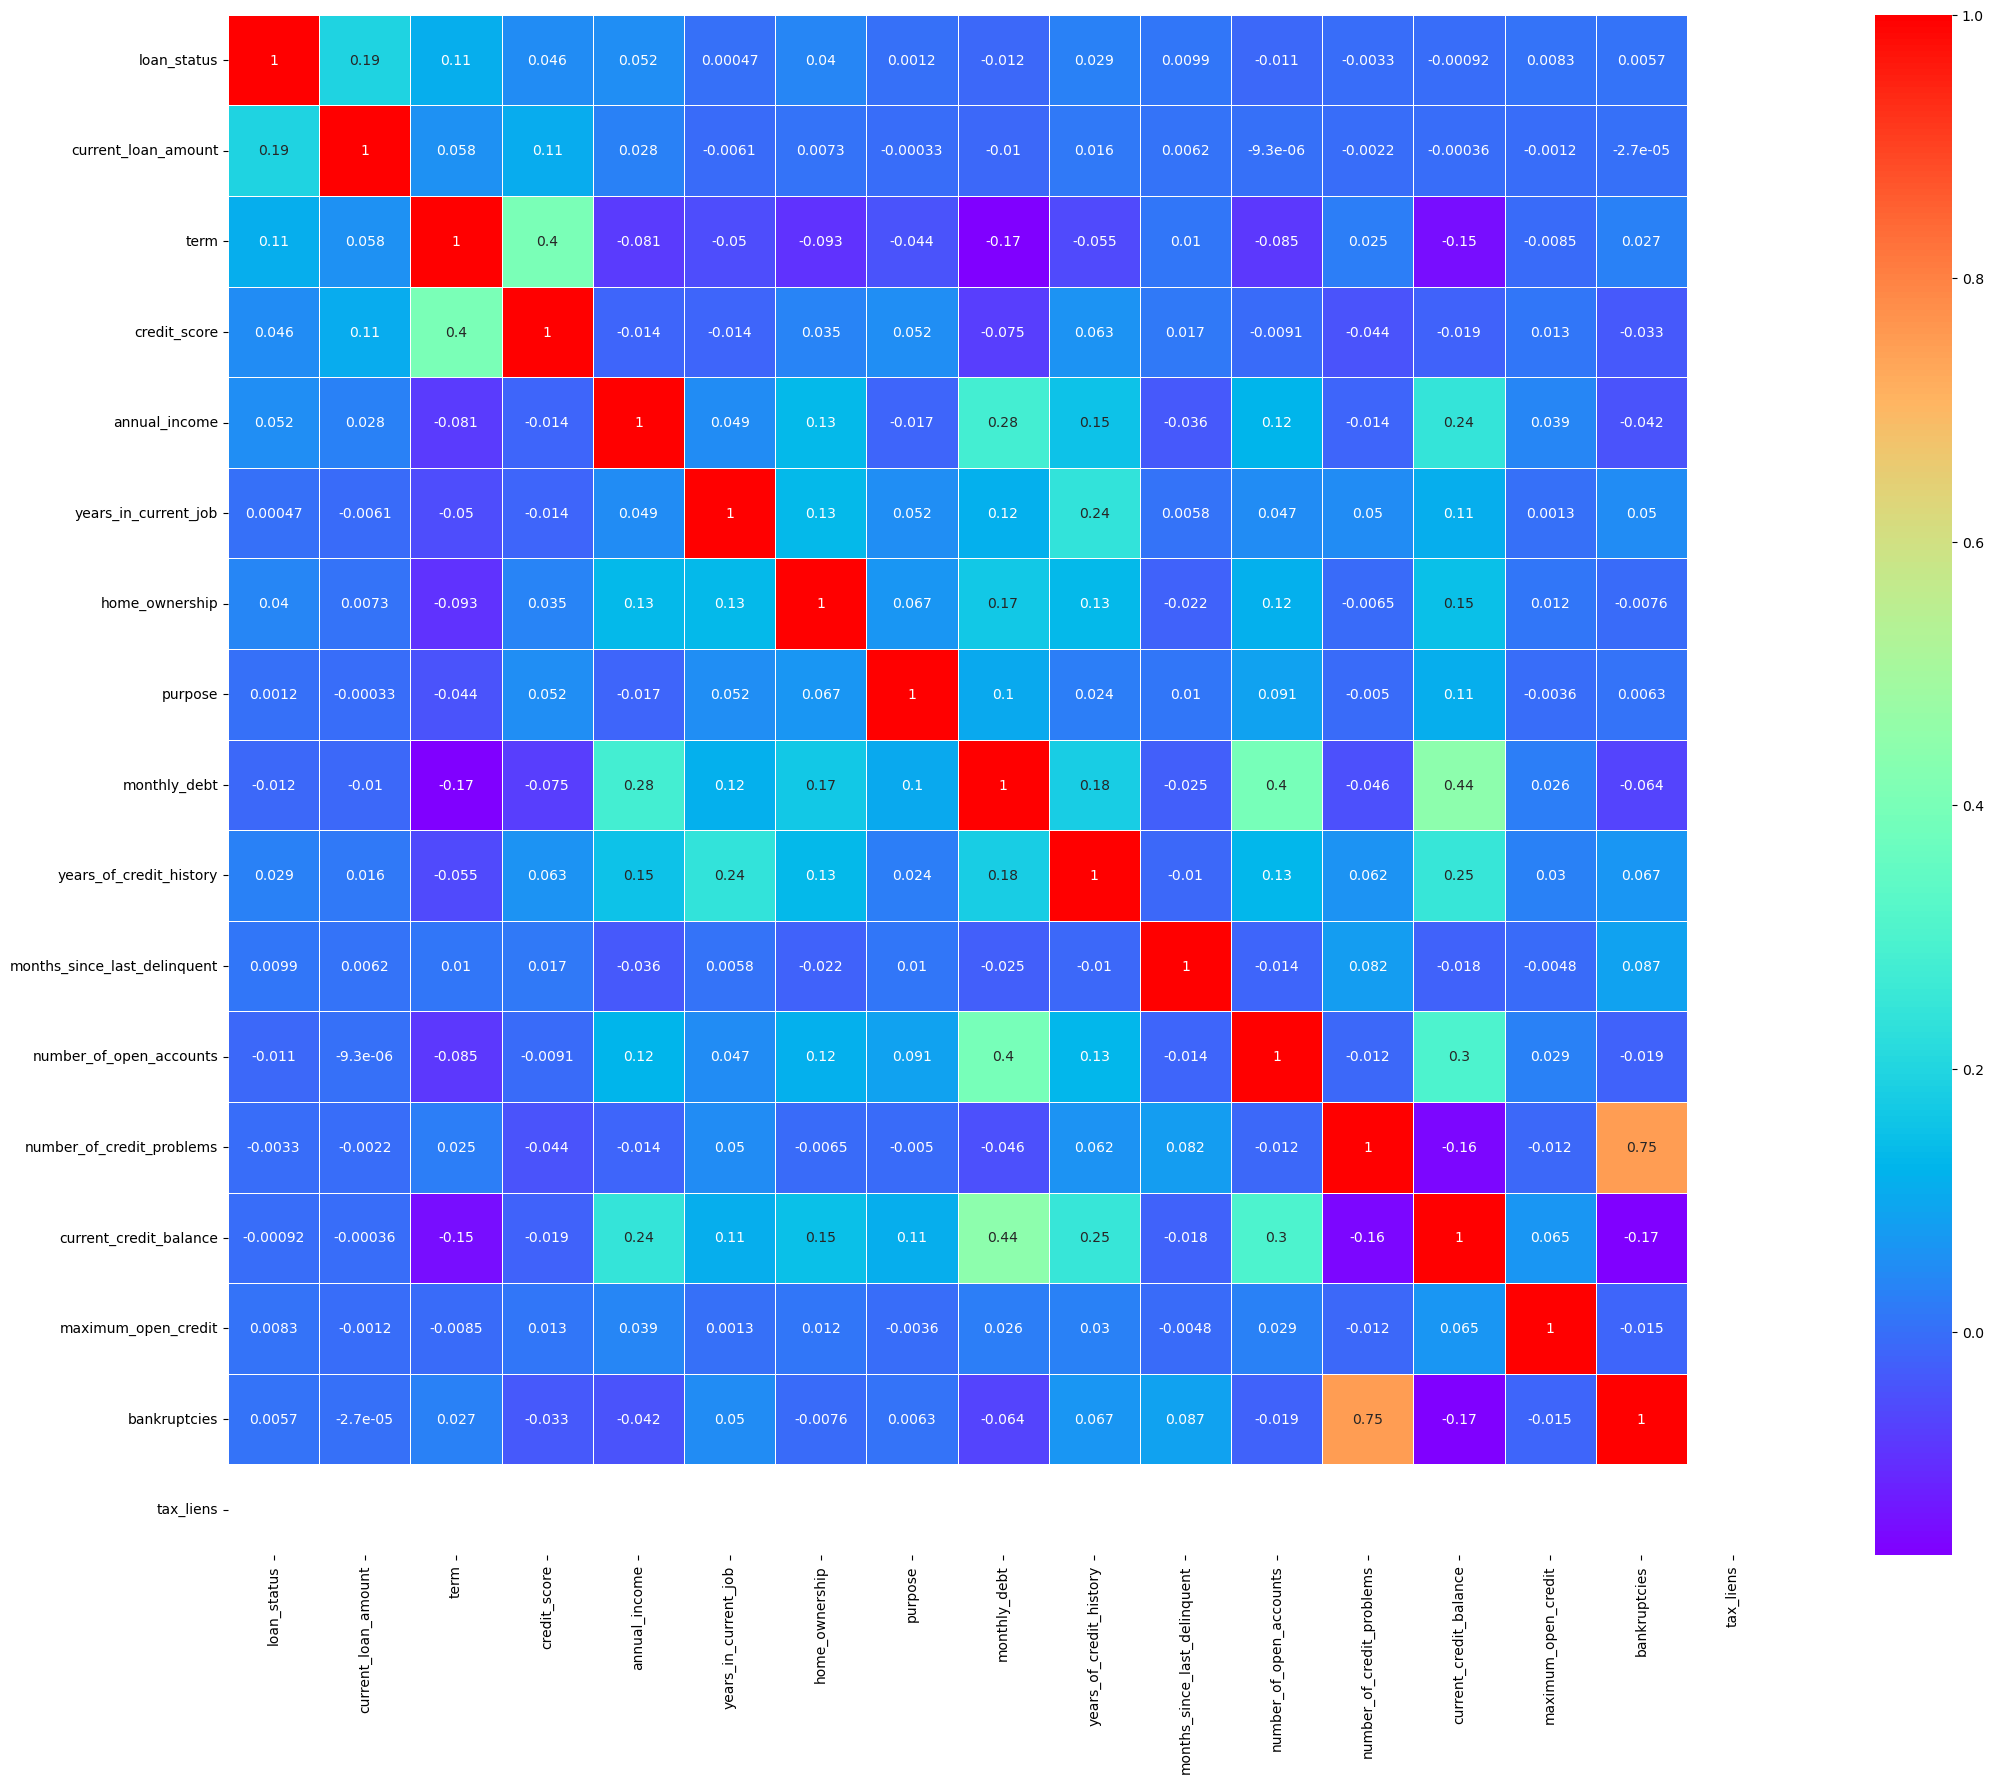

In [143]:
plt.subplots(figsize=(25,20))
sns.heatmap(data.corr(),cmap='rainbow',linewidths=.5,annot=True)
plt.show()

In [144]:
data

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,1,445412.0,1,709.0,1167493.0,8,3,13,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,1,262328.0,1,724.0,1174162.0,10,3,15,33295.98,21.1,8.0,10.0,0.0,229976.0,850784.0,0.0,0.0
2,1,99999999.0,1,741.0,2231892.0,8,1,15,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,1,347666.0,0,721.0,806949.0,3,1,15,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,1,176220.0,1,724.0,1174162.0,5,2,15,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,1,312246.0,1,724.0,1174162.0,10,3,15,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,0.0
100510,1,312246.0,1,724.0,1174162.0,10,3,15,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,0.0
100511,1,312246.0,1,724.0,1174162.0,10,3,15,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,0.0
100512,1,312246.0,1,724.0,1174162.0,10,3,15,16220.30,16.9,32.0,10.0,0.0,209817.0,467874.0,0.0,0.0


In [145]:
data.loan_status.skew()

-1.315530897069964

In [146]:
data.purpose.skew()

-3.6234935771077974

In [147]:
data.term.skew()

-0.9994247312101028

In [148]:
data.annual_income.skew()

51.86117480463022

## Data Preprocessing

In [153]:
data1=data.copy()

In [154]:
data.columns

Index(['loan_status', 'current_loan_amount', 'term', 'credit_score',
       'annual_income', 'years_in_current_job', 'home_ownership', 'purpose',
       'monthly_debt', 'years_of_credit_history',
       'months_since_last_delinquent', 'number_of_open_accounts',
       'number_of_credit_problems', 'current_credit_balance',
       'maximum_open_credit', 'bankruptcies', 'tax_liens'],
      dtype='object')

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
data1[['current_loan_amount', 'term', 'credit_score',
       'annual_income', 'years_in_current_job', 'home_ownership', 'purpose',
       'monthly_debt', 'years_of_credit_history', 'number_of_open_accounts',
       'number_of_credit_problems', 'current_credit_balance',
       'maximum_open_credit', 'bankruptcies', 'tax_liens']]=scaler.fit_transform(data1[['current_loan_amount', 'term', 'credit_score',
       'annual_income', 'years_in_current_job', 'home_ownership', 'purpose',
       'monthly_debt', 'years_of_credit_history', 'number_of_open_accounts',
       'number_of_credit_problems', 'current_credit_balance',
       'maximum_open_credit', 'bankruptcies', 'tax_liens']])

In [156]:
data1.head()

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,1,0.004347,1.0,0.746988,0.006592,0.777778,1.000000,0.866667,0.117112,0.451827,32.0,0.260870,0.066667,0.148257,0.000271,0.142857,0.0
1,1,0.002516,1.0,0.837349,0.006632,1.000000,1.000000,1.000000,0.747757,0.581395,8.0,0.434783,0.000000,0.149417,0.000553,0.000000,0.0
2,1,1.000000,1.0,0.939759,0.013024,0.777778,0.333333,1.000000,0.655782,0.375415,29.0,0.782609,0.066667,0.193611,0.000487,0.000000,0.0
3,1,0.003369,0.0,0.819277,0.004413,0.222222,0.333333,1.000000,0.196324,0.279070,32.0,0.391304,0.000000,0.166539,0.000251,0.000000,0.0
4,1,0.001654,1.0,0.837349,0.006632,0.444444,0.666667,1.000000,0.463524,0.083056,32.0,0.652174,0.000000,0.164675,0.000277,0.000000,0.0


## Create X and y

In [157]:
X = data1.drop('loan_status',axis=1)
y = data1.loan_status

In [158]:
X.head()

,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,0.004347,1.0,0.746988,0.006592,0.777778,1.000000,0.866667,0.117112,0.451827,32.0,0.260870,0.066667,0.148257,0.000271,0.142857,0.0
1,0.002516,1.0,0.837349,0.006632,1.000000,1.000000,1.000000,0.747757,0.581395,8.0,0.434783,0.000000,0.149417,0.000553,0.000000,0.0
2,1.000000,1.0,0.939759,0.013024,0.777778,0.333333,1.000000,0.655782,0.375415,29.0,0.782609,0.066667,0.193611,0.000487,0.000000,0.0
3,0.003369,0.0,0.819277,0.004413,0.222222,0.333333,1.000000,0.196324,0.279070,32.0,0.391304,0.000000,0.166539,0.000251,0.000000,0.0
4,0.001654,1.0,0.837349,0.006632,0.444444,0.666667,1.000000,0.463524,0.083056,32.0,0.652174,0.000000,0.164675,0.000277,0.000000,0.0


In [159]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: loan_status, dtype: int64

## Train_test split

In [207]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=14)

In [208]:
x_train.shape

(80411, 16)

In [209]:
y_test.shape

(20103,)

In [163]:
## Smote 

In [164]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [165]:
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [166]:
print('Actual value',Counter(y_train))
print('SMOTE value',Counter(y_smote))

Actual value Counter({1: 62297, 0: 18114})
SMOTE value Counter({1: 62297, 0: 62297})


## Create Model Creation

### Model -1  Decision Tree

In [4]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error

In [212]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()
dt1.fit(x_smote,y_smote)
dt_smote_pred = dt1.predict(x_test)

In [213]:
accuracy_score(y_test,dt_smote_pred)

0.9496592548375864

In [214]:
r2_score(y_test,dt_smote_pred)

0.7107088390193849

In [221]:
print(classification_report(y_test,dt_smote_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      4510
           1       0.97      0.97      0.97     15593

    accuracy                           0.95     20103
   macro avg       0.93      0.93      0.93     20103
weighted avg       0.95      0.95      0.95     20103



## Model -2 RandomForest

In [219]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier()
random.fit(x_smote,y_smote)
rf_smote_pred = random.predict(x_test)

In [228]:
accuracy_score(y_test,rf_smote_pred)

0.9584639108590758

In [233]:
r2_score(y_test,rf_smote_pred)

0.7613062061078917

## Model -3 RandomForest RandomizedSearchCV

In [1]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False] #sampling

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_rgrs = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_rgrs, scoring='r2',param_distributions=random_grid, n_iter=80, cv=3,
                               verbose=1, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters
print(f"Best paramters: {rf_best_params})") ##printing  best parameters


KeyboardInterrupt



## Model -4 Logistic Regression

In [234]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
lr_predict=LR.predict(x_test)

In [235]:
accuracy_score(y_test,lr_predict)

0.7756553748196786

In [236]:
r2_score(y_test,lr_predict)

-0.2892323478483936

In [237]:
mean_squared_error(y_test,lr_predict)

0.22434462518032133

In [238]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4510
           1       0.78      1.00      0.87     15593

    accuracy                           0.78     20103
   macro avg       0.39      0.50      0.44     20103
weighted avg       0.60      0.78      0.68     20103



In [241]:
LR.fit(x_smote,y_smote)
lr_smote_pred=LR.predict(x_test)

In [242]:
accuracy_score(y_test,lr_smote_pred)

0.532408098293787

In [243]:
r2_score(y_test,lr_smote_pred)

-1.687091811480022

## Model -5 KNeighbors 

In [140]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,11):
    KNN=KNeighborsClassifier(n_neighbors=i)
    KNN.fit(x_train,y_train)
    i_pred=KNN.predict(x_test)
    error_rate.append(np.mean(i_pred!=y_test))

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),error_rate,marker='o')
plt.title('Error vs K value')
plt.xlabel('Kneighbour')
plt.ylabel('Counts')

In [68]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
knn_predict=KNN.predict(x_test)

In [69]:
accuracy_score(y_test,knn_predict)

0.7934139183206487

In [70]:
mean_squared_error(y_test,knn_predict)

0.20658608167935133

In [71]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.58      0.30      0.39      4525
           1       0.82      0.94      0.88     15578

    accuracy                           0.79     20103
   macro avg       0.70      0.62      0.63     20103
weighted avg       0.77      0.79      0.77     20103



## Model -6 Support Victors Machine

In [72]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
svc_pred=svc.predict(x_test)

In [73]:
accuracy_score(y_test,svc_pred)

0.820971994229717

In [74]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.20      0.34      4525
           1       0.81      1.00      0.90     15578

    accuracy                           0.82     20103
   macro avg       0.91      0.60      0.62     20103
weighted avg       0.85      0.82      0.77     20103



## Model- 7 Gradient Boosting 

In [244]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(n_estimators=150)
boost.fit(x_train,y_train)
boost_pred = boost.predict(x_test)

In [245]:
accuracy_score(y_test,boost_pred)

0.8105257921703228

In [246]:
print(classification_report(y_test,boost_pred))

              precision    recall  f1-score   support

           0       0.78      0.22      0.34      4510
           1       0.81      0.98      0.89     15593

    accuracy                           0.81     20103
   macro avg       0.80      0.60      0.61     20103
weighted avg       0.81      0.81      0.77     20103



In [247]:
boost.fit(x_smote,y_smote)
boost_pred = boost.predict(x_test)

In [248]:
accuracy_score(y_test,boost_pred)

0.7899815947868477

## Model -8 XGB boosting

In [77]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

In [78]:
accuracy_score(y_test,xgb_pred)

0.8188330099985077

In [79]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.83      0.25      0.38      4525
           1       0.82      0.98      0.89     15578

    accuracy                           0.82     20103
   macro avg       0.82      0.62      0.64     20103
weighted avg       0.82      0.82      0.78     20103



In [80]:
r2_score(y_test,xgb_pred)

-0.038653122515177385

## Model -9 XGB RandomizedSerachCV

In [83]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,21,25.6,27,30,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100],
              'alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

xgb_r=XGBClassifier(random_state=42,verbosity=0,silent=0)
xgb_r_cv= RandomizedSearchCV(estimator=xgb_r, scoring='r2', param_distributions = param_grid, n_iter=100, cv=3, 
                               verbose=1, n_jobs=-1)
                                                    
xgb_r_cv.fit(x_train, y_train)
cv_best_params = xgb_r_cv.best_params_ 
print(f"Best paramters: {cv_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 65, 'max_depth': 5, 'learning_rate': 0.3, 'lambda': 102.4, 'gamma': 0.4, 'alpha': 0})


In [86]:
best_param_dt=XGBClassifier(n_estimators=65, max_depth=5, learning_rate=0.3, reg_lambda=102.4, gamma=0.4, alpha=0)
best_param_dt.fit(x_train,y_train)
y_hat=best_param_dt.predict(x_test)
y_hat

array([1, 1, 1, ..., 1, 0, 1])

In [87]:
accuracy_score(y_test,y_hat)

0.8216186638810128

In [90]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.94      0.22      0.36      4525
           1       0.81      1.00      0.90     15578

    accuracy                           0.82     20103
   macro avg       0.88      0.61      0.63     20103
weighted avg       0.84      0.82      0.78     20103



## Model Comparison

In [5]:
df=pd.DataFrame()
df['Model'] = ['Decision Tree','Random Forest ','RandomForest RandomizedSearchCV','Logistic Regression','KNeighbor Classifier',
               'Support Vectors Machine','Gradient Boosting','XGB','XGB RandomizedSearchCV']
df['Accuracy Score'] = [0.94,0.95,0.82,0.79,0.82,0.82,0.81,0.81,0.82]
df

,Model,Accuracy Score
0,Decision Tree,0.94
1,Random Forest,0.95
2,RandomForest RandomizedSearchCV,0.82
3,Logistic Regression,0.79
4,KNeighbor Classifier,0.82
5,Support Vectors Machine,0.82
6,Gradient Boosting,0.81
7,XGB,0.81
8,XGB RandomizedSearchCV,0.82


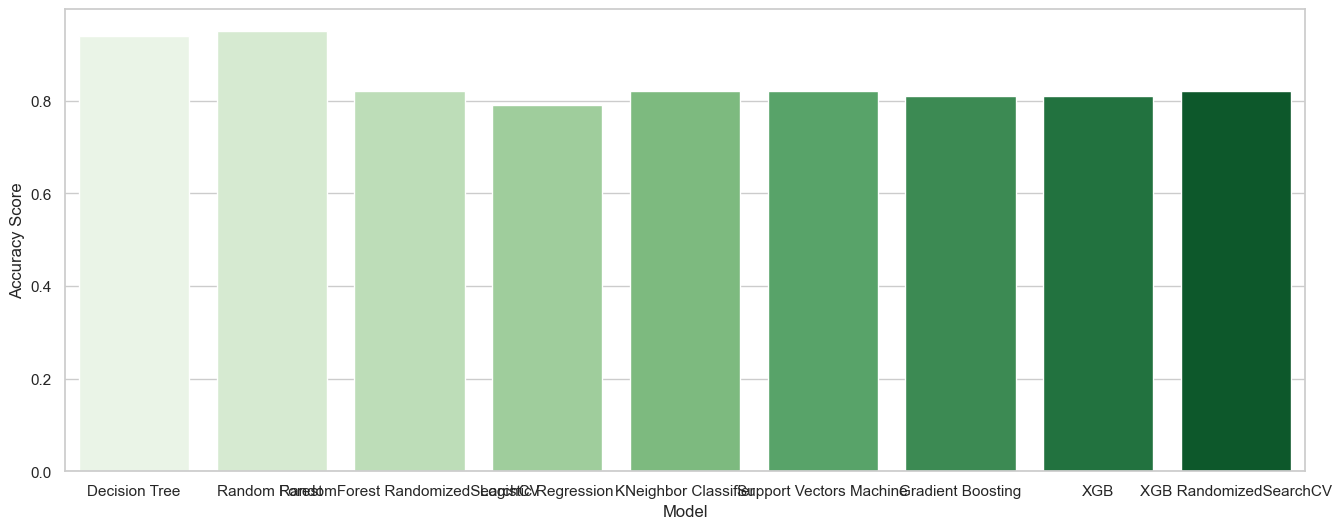

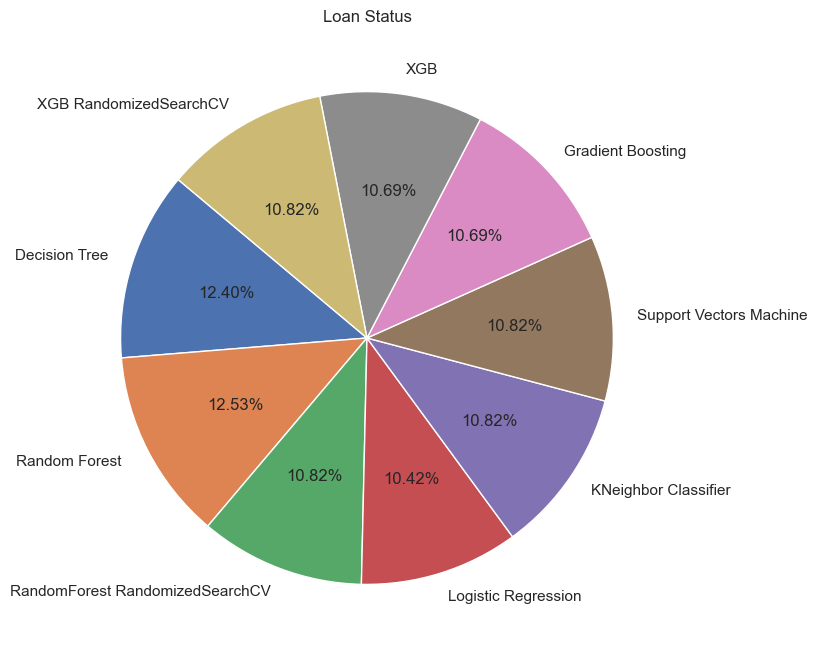

In [7]:
plt.figure(figsize=(16,6))
sns.set(style='whitegrid')
sns.barplot(x='Model',y='Accuracy Score',data=df,palette='Greens')


# Create the pie plot
Accuracy_Score = [0.94,0.95,0.82,0.79,0.82,0.82,0.81,0.81,0.82]
Model = ['Decision Tree','Random Forest ','RandomForest RandomizedSearchCV','Logistic Regression','KNeighbor Classifier',
         'Support Vectors Machine','Gradient Boosting','XGB','XGB RandomizedSearchCV']
plt.figure(figsize=(8, 8))
plt.pie(Accuracy_Score, labels=Model, autopct='%1.2f%%', startangle=140)
plt.title('Loan Status')
plt.show()


## Project Summary

Certainly, here's a summary of the data presented in the image:

*Data Content:*

The image displays a table containing the names of various machine learning models and their corresponding accuracy scores. 

*Key Observations:*

* *Models:* The table lists nine different models: Decision Tree, Random Forest, Random Forest RandomizedSearchCV, Logistic Regression, KNeighbor Classifier, Support Vectors Machine, Gradient Boosting, XGB, and XGB RandomizedSearchCV.
* *Accuracy Scores:* Each model is associated with an accuracy score ranging from 0.79 to 0.95.
* *Best Performer:* Decision Tree and Random Forest appear to be the top-performing models with an accuracy score of 0.94 and 0.95, respectively.
* *Visualization:* A bar plot is included to visually represent the accuracy scores of the different models.

*Limitations:*

* *Data Size:* The dataset is relatively small, consisting of only nine models and their corresponding accuracy scores.
* *Model Details:* The image does not provide information about the specific parameters or configurations used for each model.
* *Context:* The context of the data (e.g., the problem being solved, the dataset used) is not provided.

*Overall:*

The image presents a preliminary comparison of different machine learning models based on their accuracy scores. However, further analysis and context are needed to draw more meaningful conclusions.

*Additional Considerations:*

* It's important to consider other evaluation metrics besides accuracy, such as precision, recall, and F1-score, to get a more comprehensive understanding of model performance.
* The choice of the best model depends on various factors, including the specific problem, dataset characteristics, and desired trade-offs between performance metrics.

Let me know if you have any other questions or would like to explore the data further!